In [1]:
#establishing environment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.stats import pearsonr, ttest_rel, ttest_ind
from numba import jit
from scipy import signal as sig
import matplotlib.patches as mpatches
from scipy.io import loadmat, savemat
from ieeg.auth import Session
from math import isnan

In [2]:
### LOADS 
### CAT SPIKE DATA. CAT#_SINGLESPIKES OR CAT#_SPIKES

with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_spikes/s_spikes/cat1_singlespikes_set.pkl", "rb") as a:   #Unpickling
    cat1_spikes_set = pickle.load(a)
    
with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/CAT/cat_spikes/s_spikes/cat2_singlespikes_set.pkl", "rb") as b:   # Unpickling
    cat2_spikes_set = pickle.load(b)
    
with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/CAT/cat_spikes/s_spikes/cat3_singlespikes_set.pkl", "rb") as c:   #Unpickling
    cat3_spikes_set = pickle.load(c)
    
with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/CAT/cat_spikes/s_spikes/cat4_singlespikes_set.pkl", "rb") as d:   # Unpickling
    cat4_spikes_set = pickle.load(d)
    
with open("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/CAT/cat_spikes/s_spikes/cat5_singlespikes_set.pkl", "rb") as e:   # Unpickling
    cat5_spikes_set = pickle.load(e)

In [3]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

zero = np.array([])
cat1_spikes_set = np.array([np.asarray(cat1_spikes_set), zero])
cat1_spikes_set = cat1_spikes_set.reshape((2,1))

cat2_spikes_set = np.array([np.asarray(cat2_spikes_set), zero])
cat2_spikes_set = cat2_spikes_set.reshape((2,1))

cat3_spikes_set = np.array([np.asarray(cat3_spikes_set), zero])
cat3_spikes_set = cat3_spikes_set.reshape((2,1))

cat4_spikes_set = np.array([np.asarray(cat4_spikes_set), zero])
cat4_spikes_set = cat4_spikes_set.reshape((2,1))

cat5_spikes_set = np.array([np.asarray(cat5_spikes_set), zero])
cat5_spikes_set = cat5_spikes_set.reshape((2,1))

In [4]:
### LOADS .NPY FILES

cat1_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat1_values.npy",allow_pickle =True)
cat2_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat2_values.npy",allow_pickle =True)
cat3_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat3_values.npy",allow_pickle =True)
cat4_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat4_values.npy",allow_pickle =True)
cat5_values = np.load("/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/cat_values/cat5_values.npy",allow_pickle =True)

In [5]:
#general chLabels
cat1_chLabels = np.array([np.array([np.array((np.linspace(1,48,48)))])])
cat2_chLabels = np.array([np.array([np.array((np.linspace(1,48,48)))])])
cat3_chLabels = np.array([np.array([np.array((np.linspace(1,64,64)))])])
cat4_chLabels = np.array([np.array([np.array((np.linspace(1,64,64)))])])
cat5_chLabels = np.array([np.array([np.array((np.linspace(1,64,64)))])])


In [6]:
# consolidate the cat data into a file that works
cat1 = {'values': cat1_values, 'seqs': cat1_spikes_set, 'chLabels': cat1_chLabels}
cat2 = {'values': cat2_values, 'seqs': cat2_spikes_set, 'chLabels': cat2_chLabels}
cat3 = {'values': cat3_values, 'seqs': cat3_spikes_set, 'chLabels': cat3_chLabels}
cat4 = {'values': cat4_values, 'seqs': cat4_spikes_set, 'chLabels': cat4_chLabels}
cat5 = {'values': cat5_values, 'seqs': cat5_spikes_set, 'chLabels': cat5_chLabels}


In [7]:
#Cat1
def mean_per_elec_catnum(cat1_spikes_set,cat1_values,cat1_chLabels):
    mean_per_elec = [];
    for ch in cat1_chLabels[0][0]:
        values_per_ch = [];
        pos = np.where(cat1_spikes_set[0][0][:,0] == ch)[0]
        for i in pos:
            values_per_ch.append(cat1_values[0][0][i])

        mean_per_elec.append(np.mean(values_per_ch,axis=0))

    return np.array(mean_per_elec)

In [8]:
mean_per_elec_cat1 = mean_per_elec_catnum(cat1_spikes_set, cat1_values, cat1_chLabels)
cat1_means = mean_per_elec_cat1[0:32]

/Users/carlosaguila/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/carlosaguila/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
mean_per_elec_cat2 = mean_per_elec_catnum(cat2_spikes_set, cat2_values, cat2_chLabels)
cat2_means = mean_per_elec_cat2[0:32]

In [10]:
mean_per_elec_cat3 = mean_per_elec_catnum(cat3_spikes_set, cat3_values, cat3_chLabels)
cat3_means = mean_per_elec_cat3[0:32]

In [11]:
mean_per_elec_cat4 = mean_per_elec_catnum(cat4_spikes_set, cat4_values, cat4_chLabels)
cat4_means = mean_per_elec_cat4[0:32]

In [12]:
mean_per_elec_cat5 = mean_per_elec_catnum(cat5_spikes_set, cat5_values, cat5_chLabels)
cat5_means = mean_per_elec_cat5[0:32]

In [ ]:
file_cat = 'cat1_%s'
file_type = '.png'
for i in range(len(cat1_means)):
    if cat1_means[i].size == 1:
        plt.figure(figsize=[10,10])
        x = np.linspace(0,2400,2400,endpoint=True)
        y=np.zeros([2400,1])
        plt.plot(x,y,'k',linewidth=5)
        plt.savefig('/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/Cat1_GRID_LINE/Cat1_%d.png' % (i+1), transparent=True)
    else:
        plt.figure(figsize=[10,10])
        plt.plot(cat1_means[i],'k',linewidth=5)
        plt.ylim([-1700,500])
        plt.savefig('/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/Cat1_GRID_LINE/Cat1_%d.png' % (i+1), transparent=True)

In [17]:
def save_EEG(filename,cat1_means,ylim):    
    for i in range(len(cat1_means)):
        if cat1_means[i].size == 1:
            plt.figure(figsize=[10,10])
            x = np.linspace(0,2400,2400,endpoint=True)
            y=np.zeros([2400,1])
            plt.plot(x,y,'k',linewidth=5)
            plt.savefig('/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/'+filename+'_%d.png' % (i+1), transparent=True)
        else:
            plt.figure(figsize=[10,10])
            plt.plot(cat1_means[i],'k',linewidth=5)
            plt.ylim(ylim)
            plt.savefig('/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Cat/'+filename+'_%d.png' % (i+1), transparent=True)
    return print('saved')

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_11456/1424856156.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,10])


saved


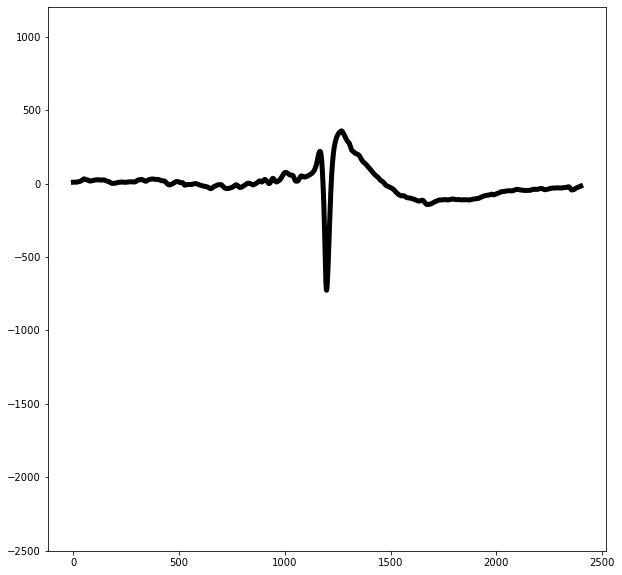

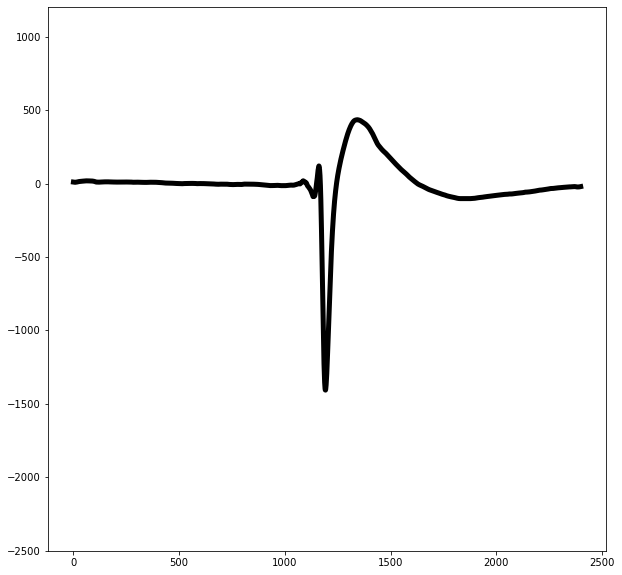

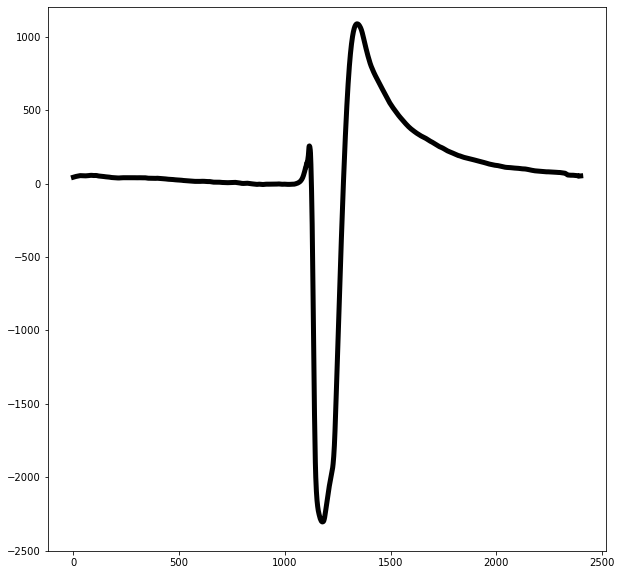

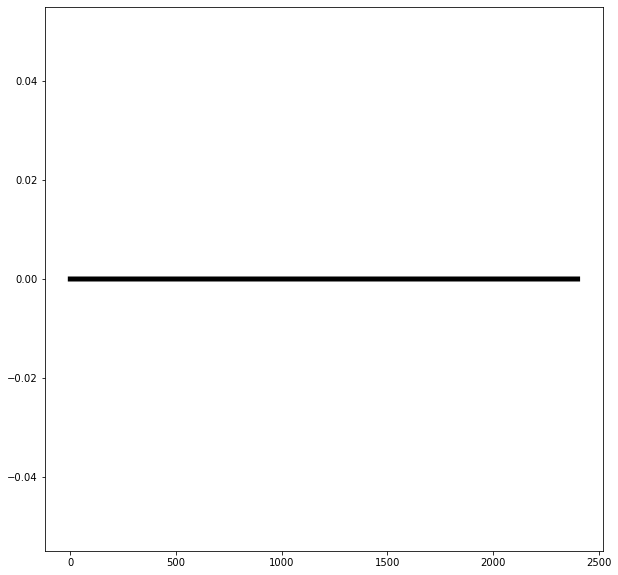

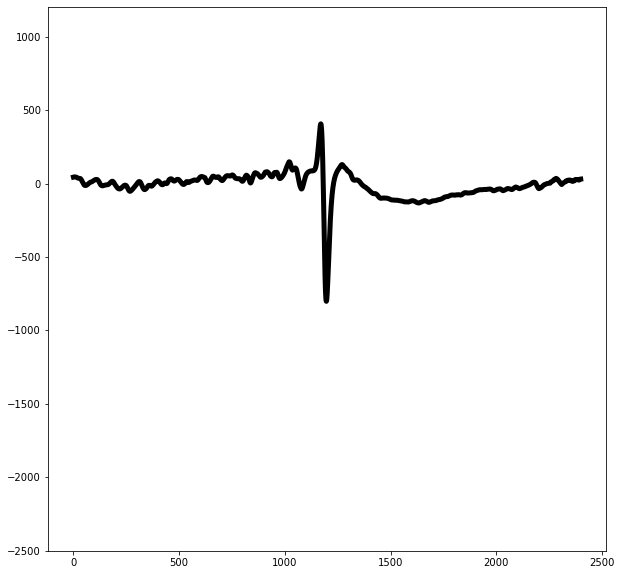

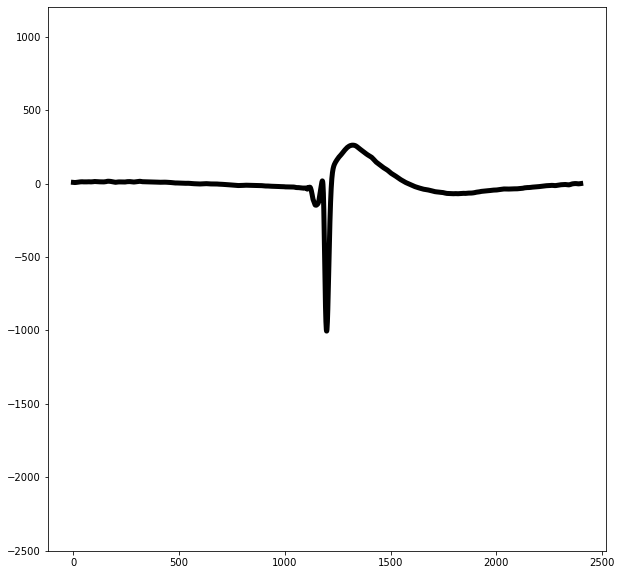

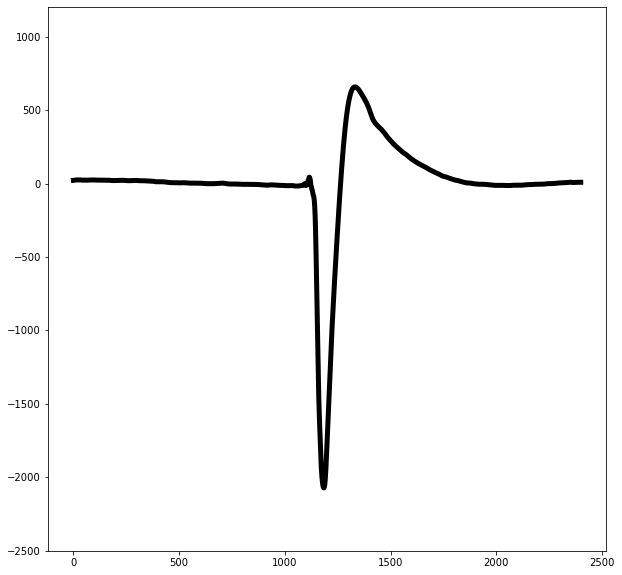

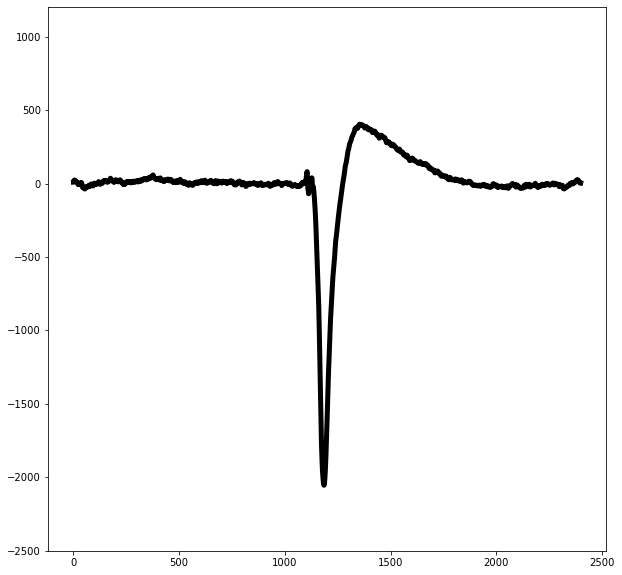

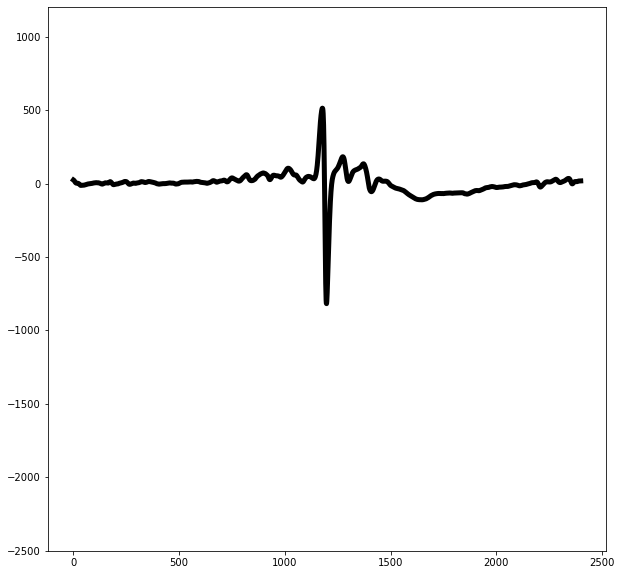

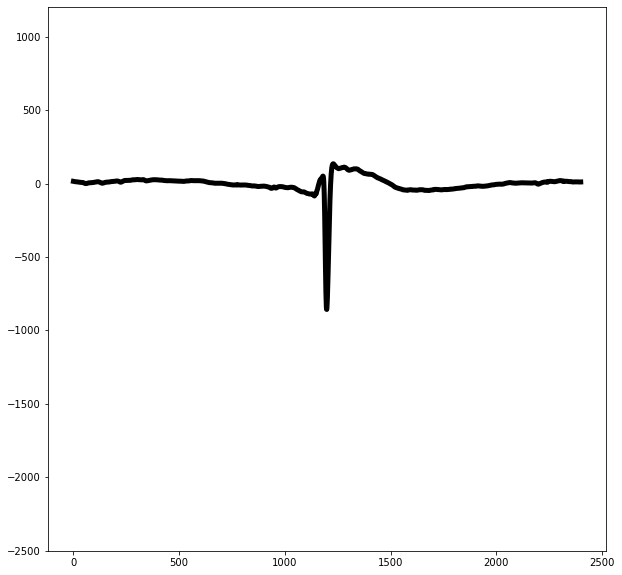

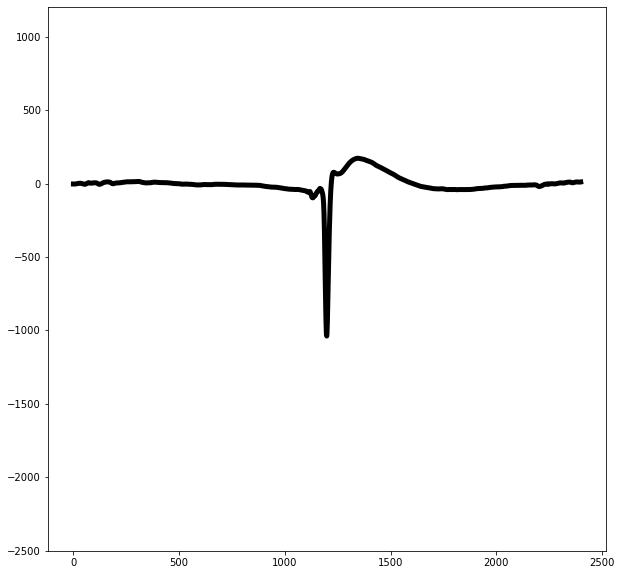

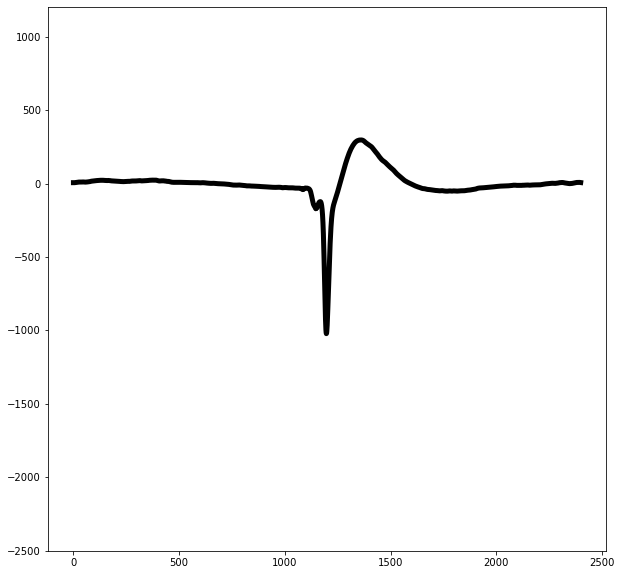

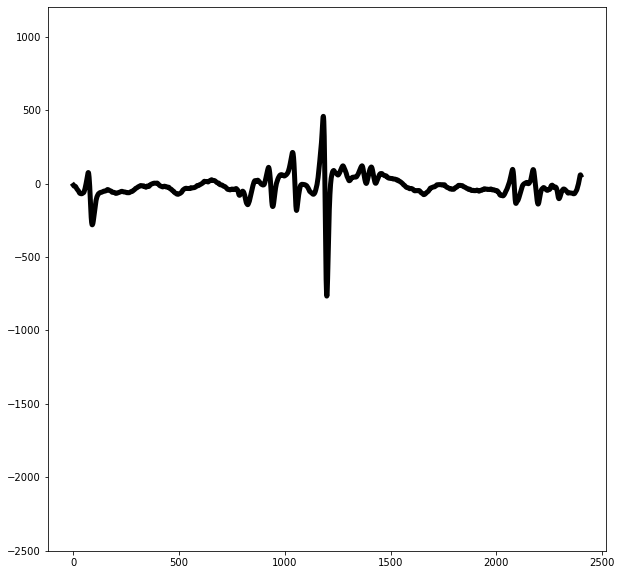

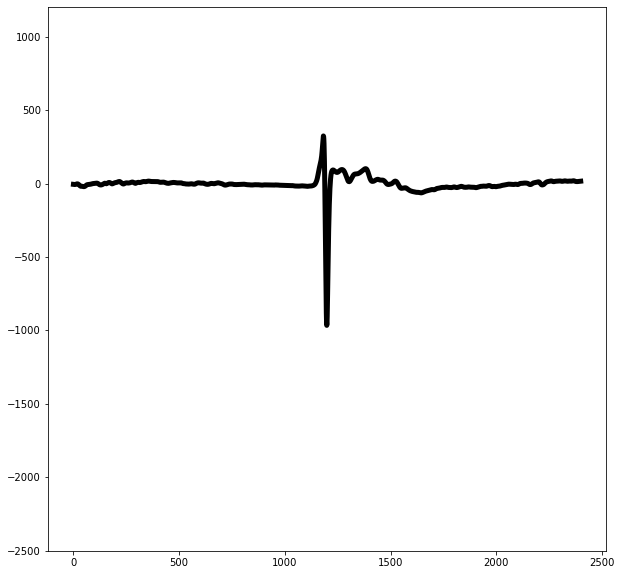

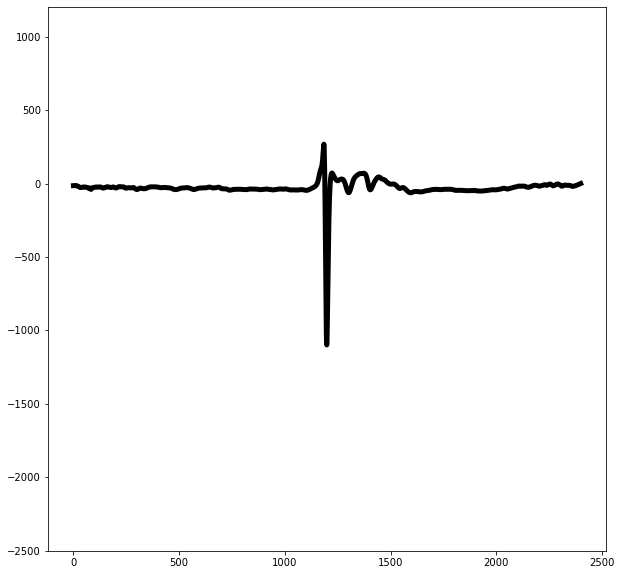

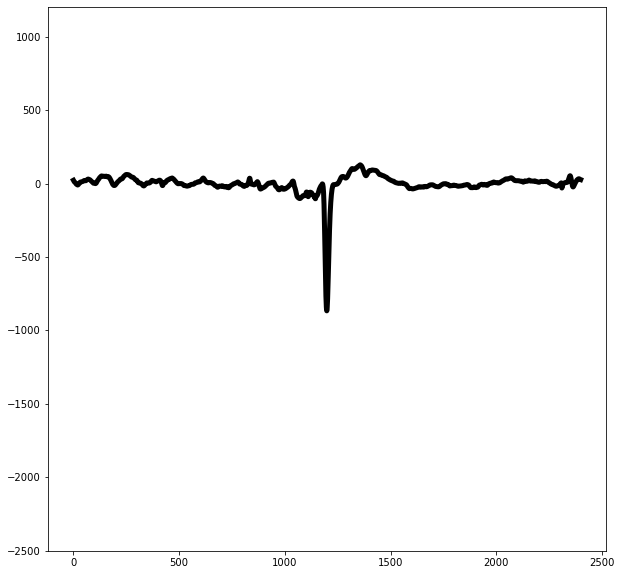

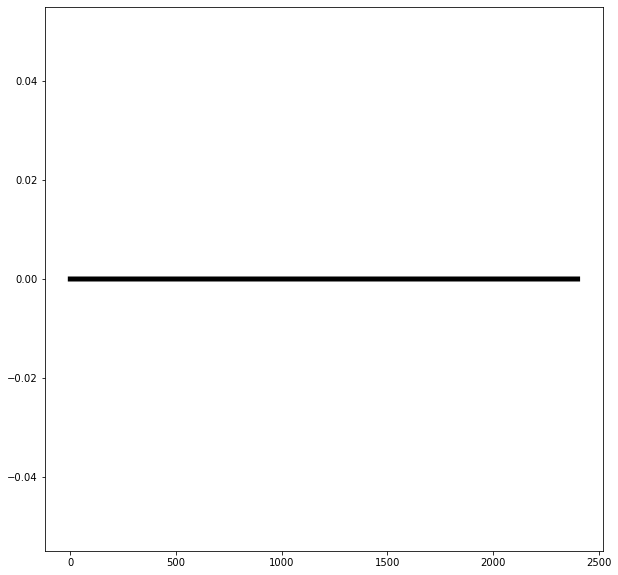

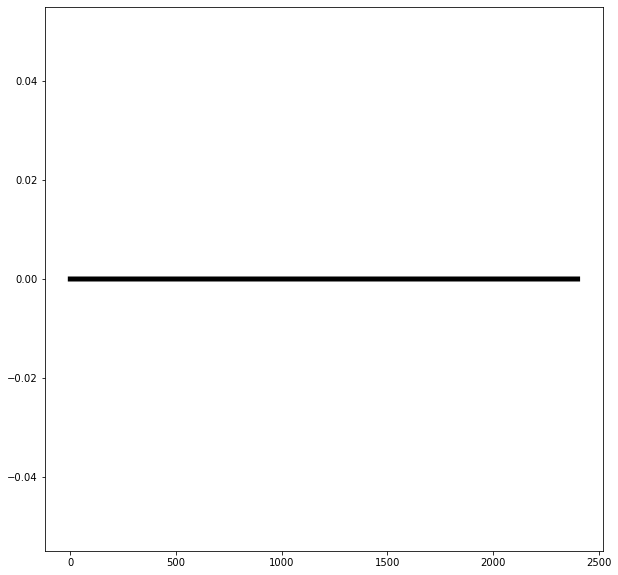

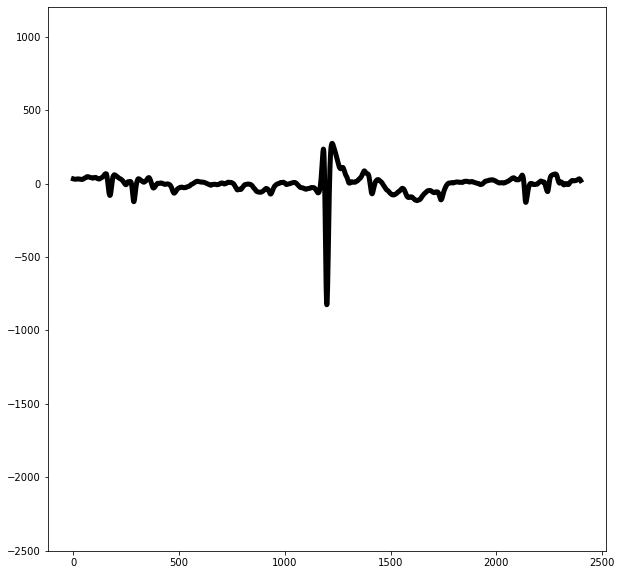

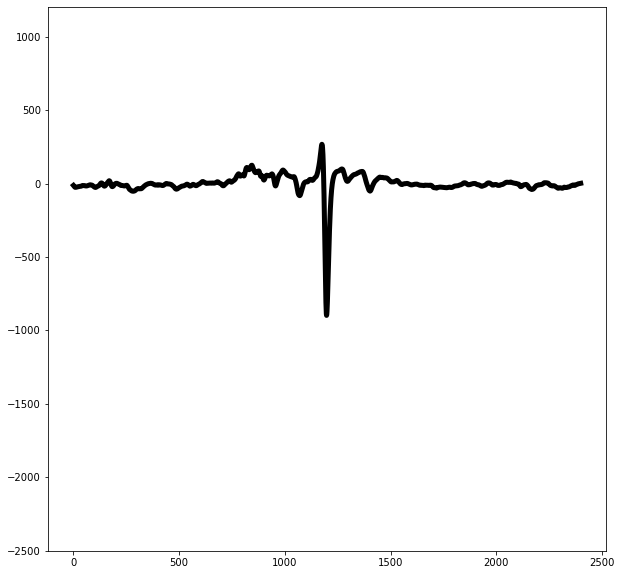

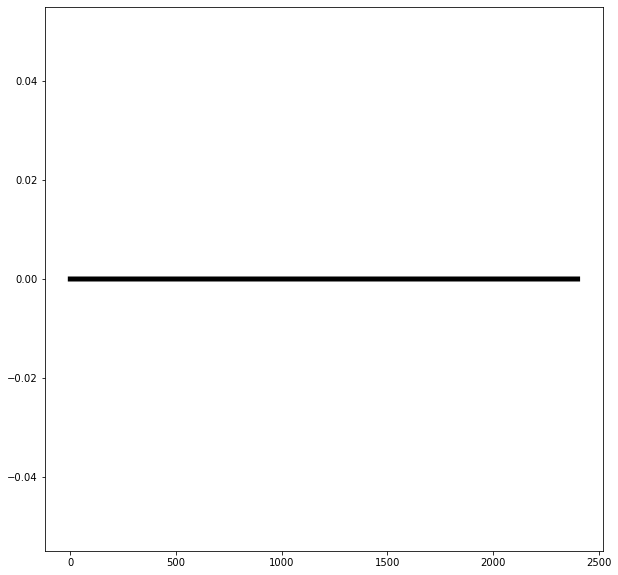

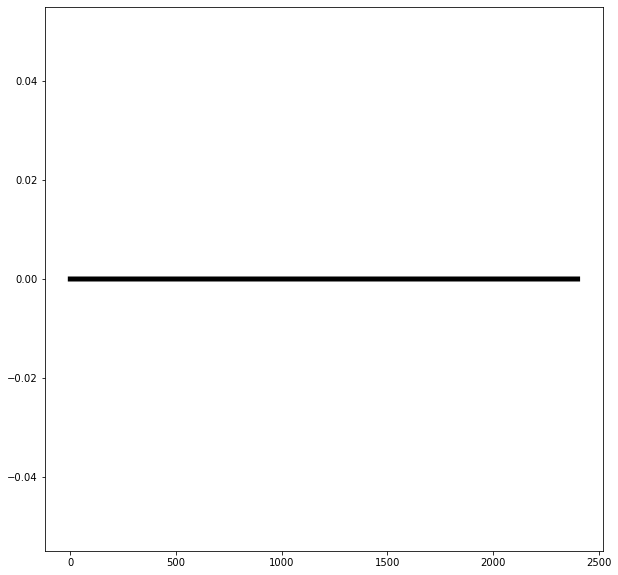

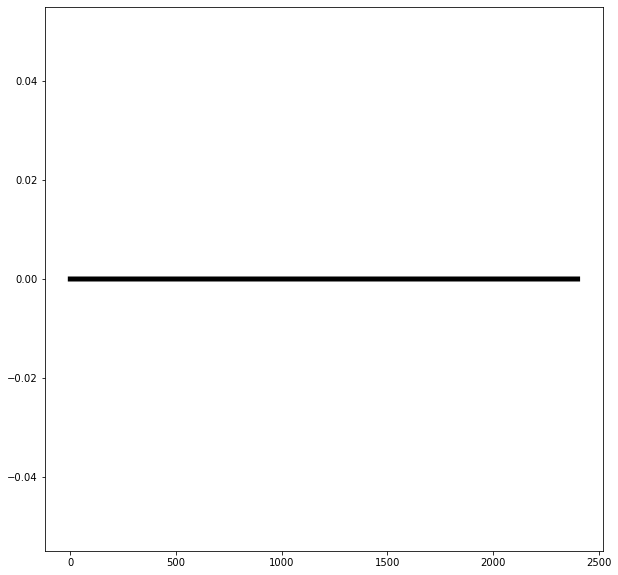

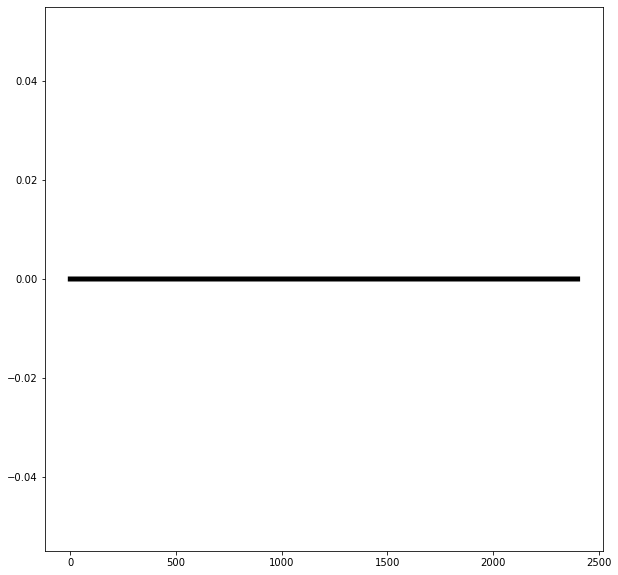

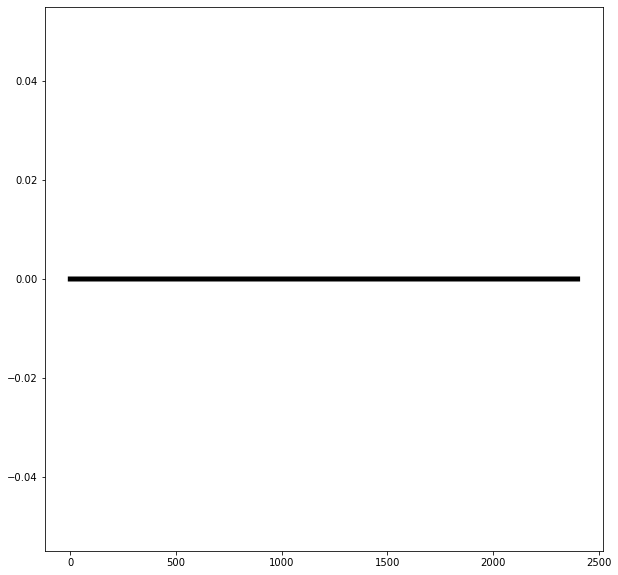

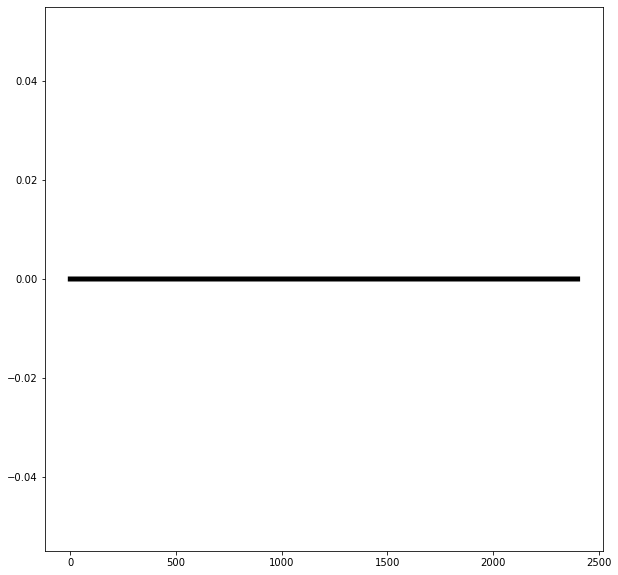

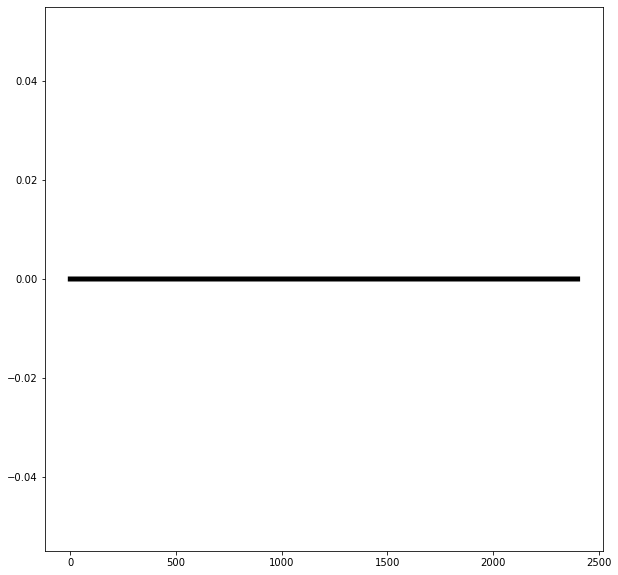

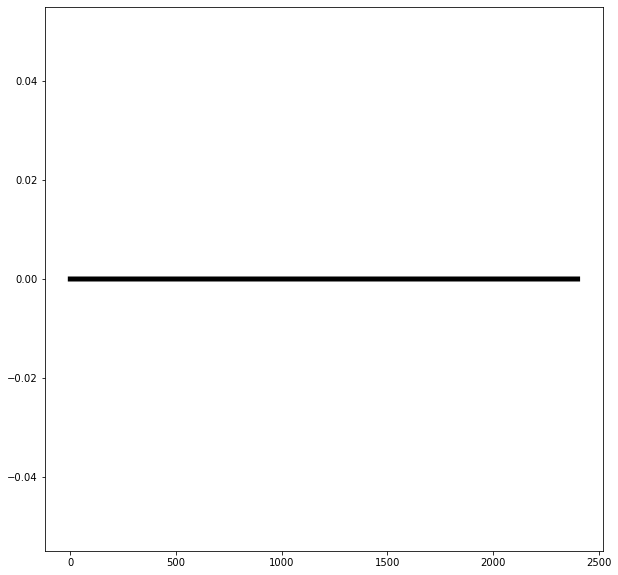

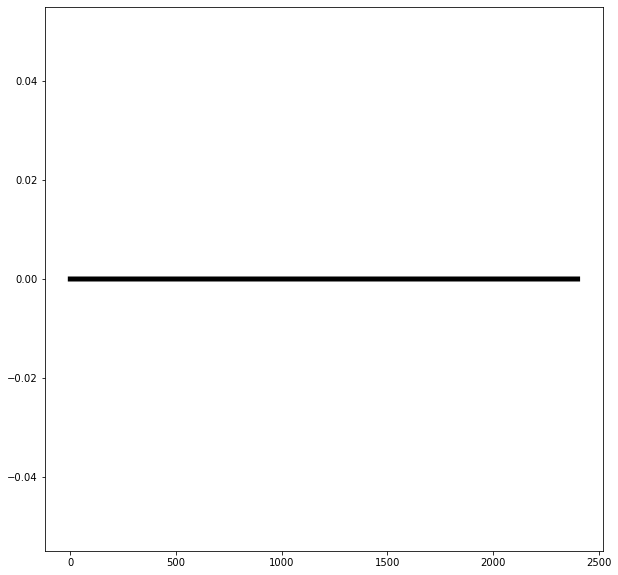

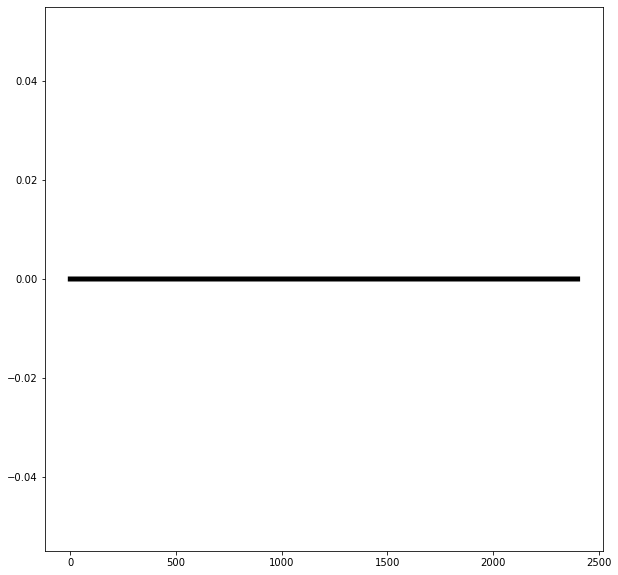

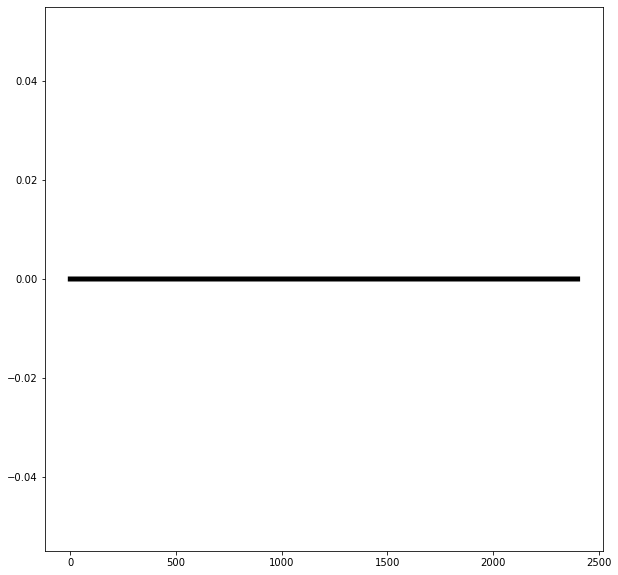

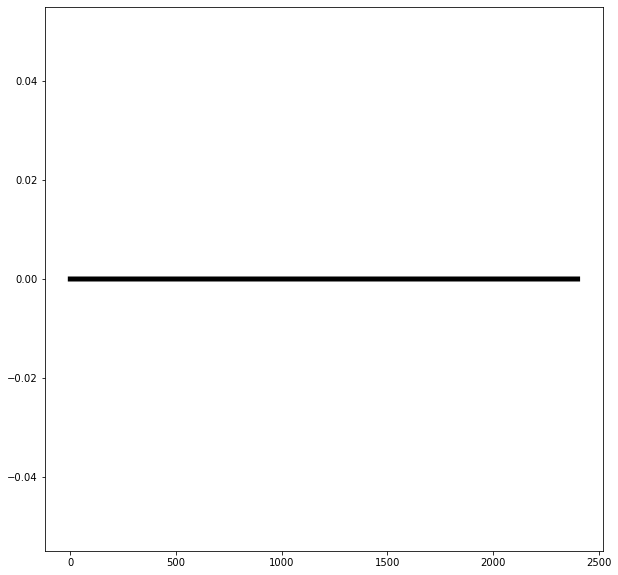

In [18]:
filename = 'Cat2_GRID_LINE/Cat2'
save_EEG(filename,cat2_means,[-2500,1200])

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_11456/1424856156.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,10])


saved


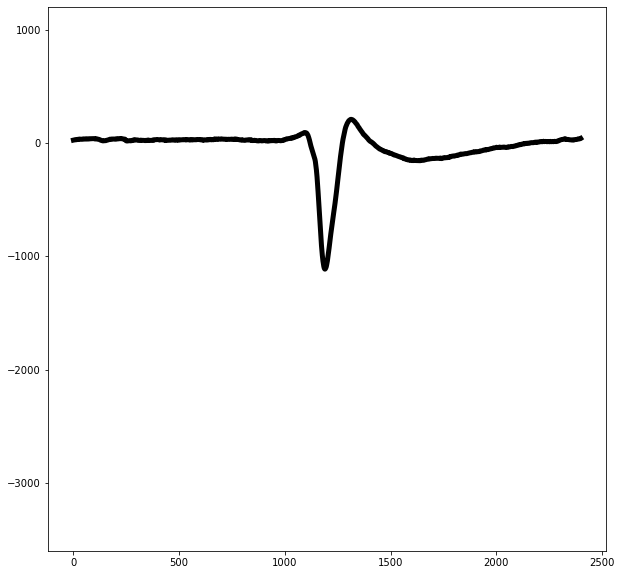

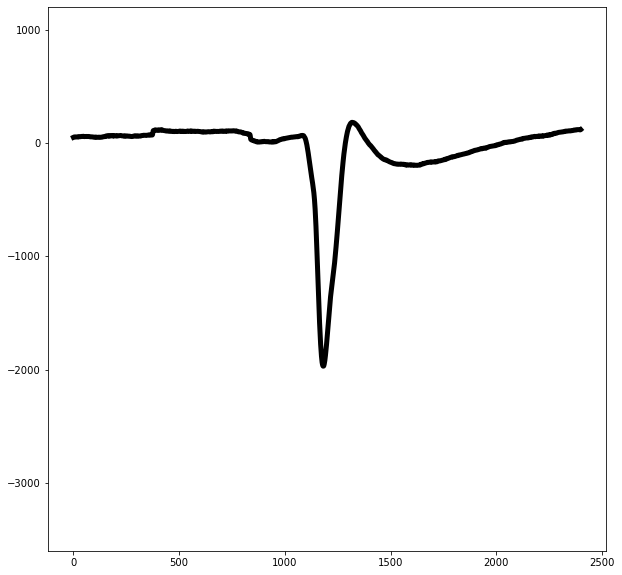

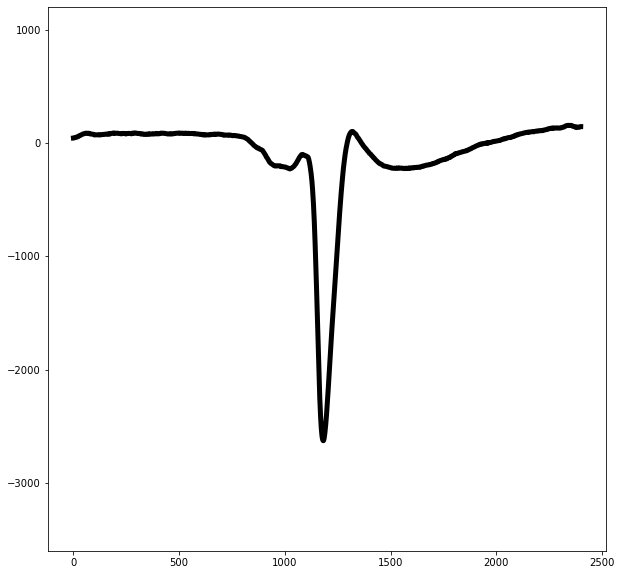

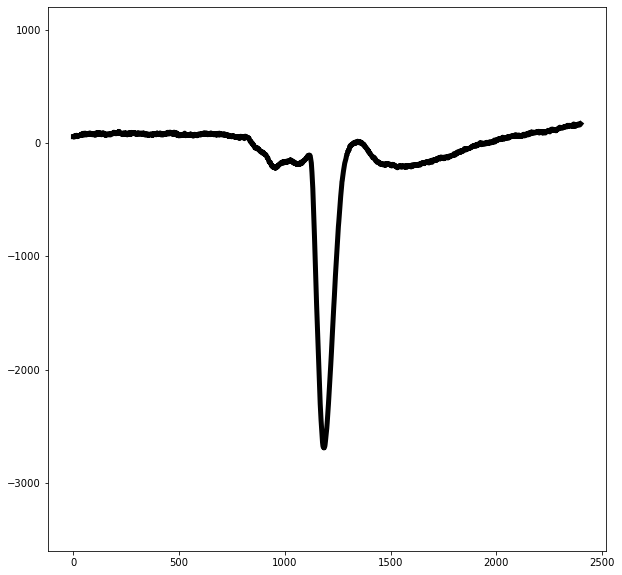

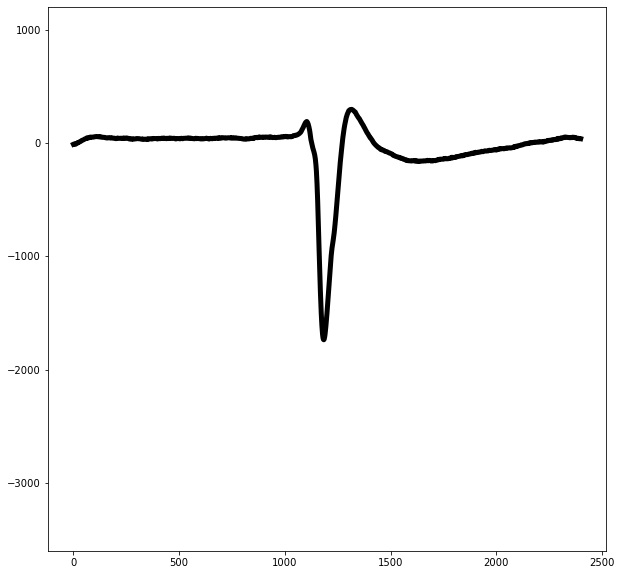

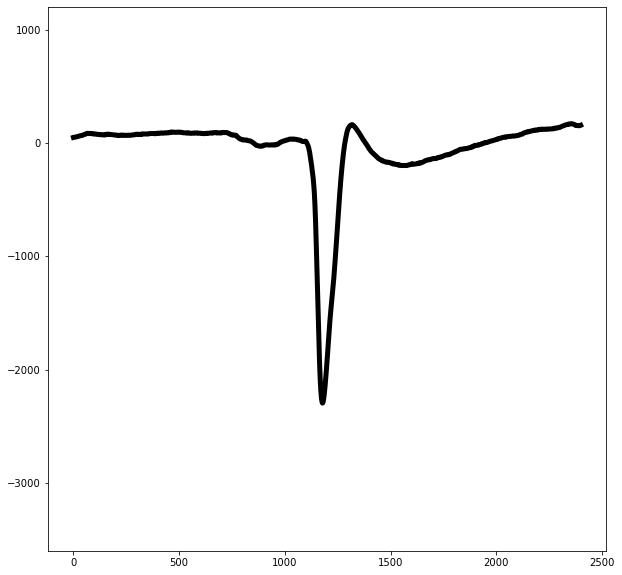

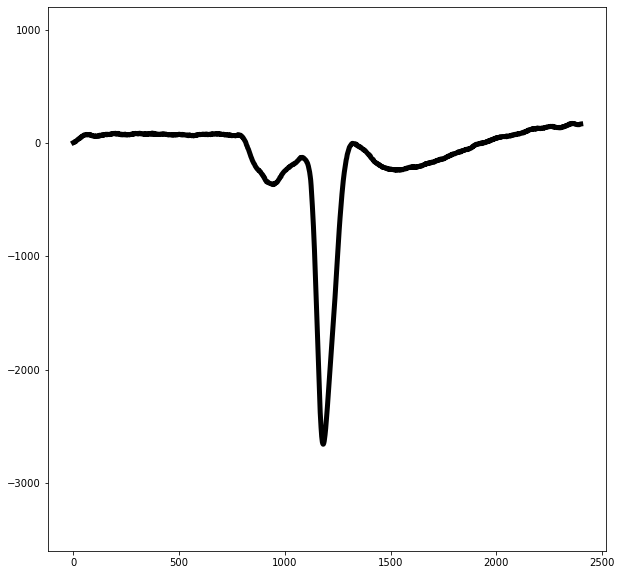

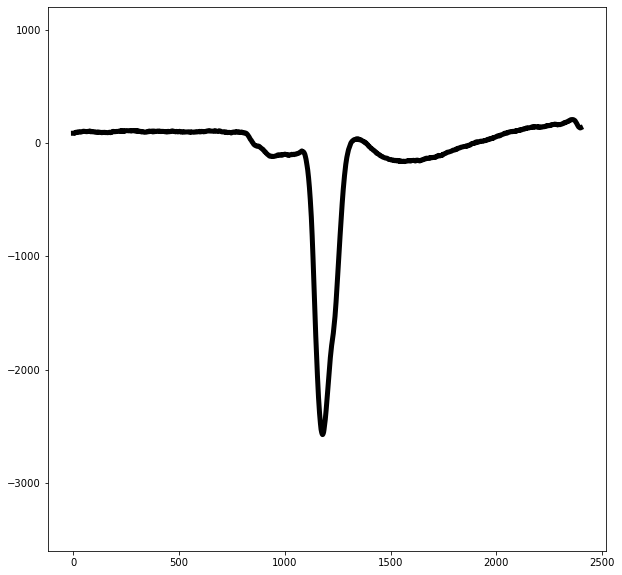

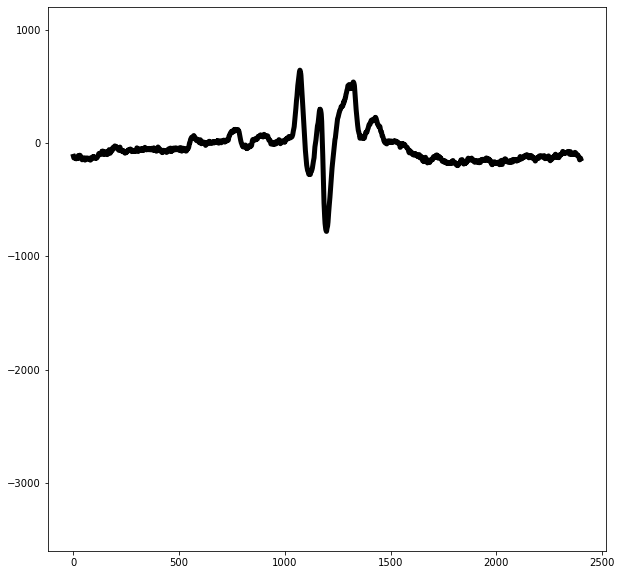

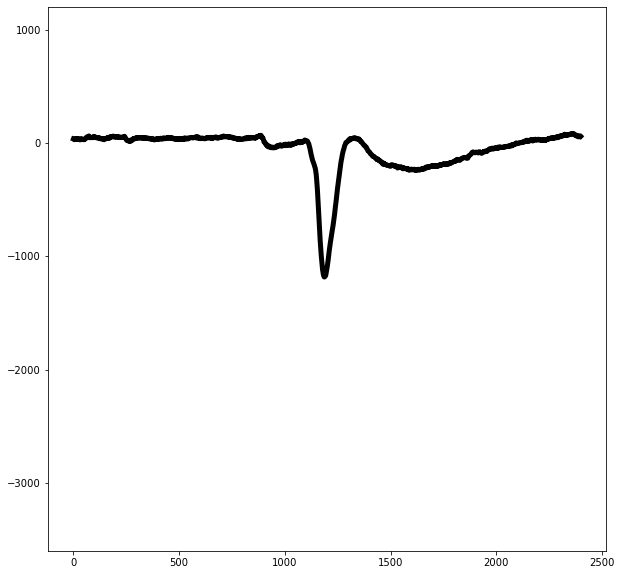

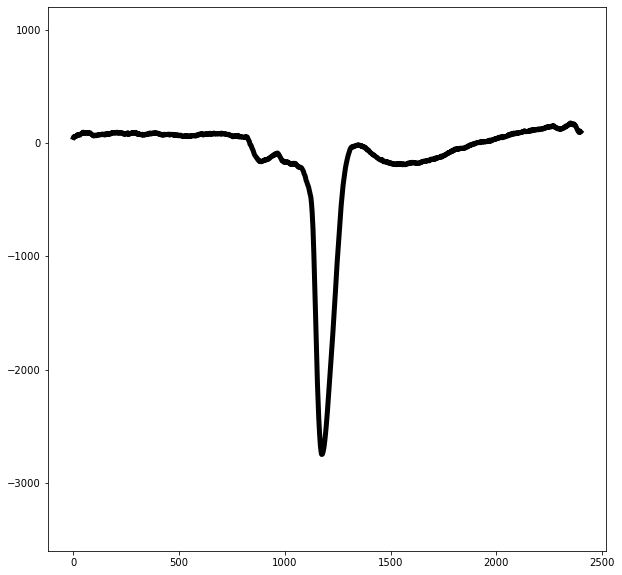

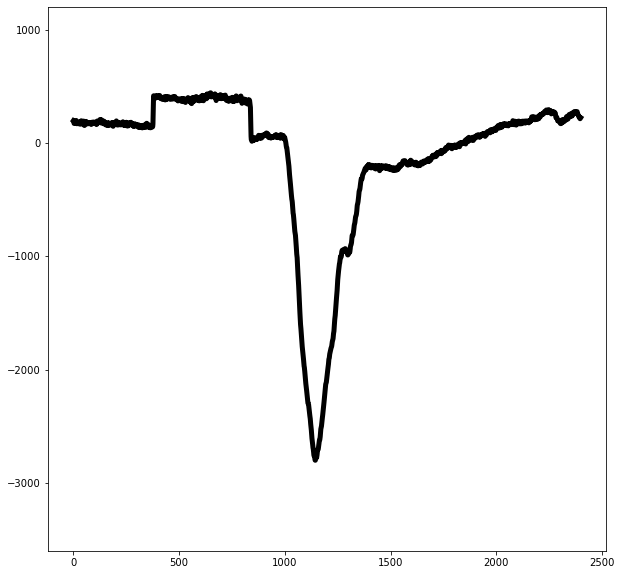

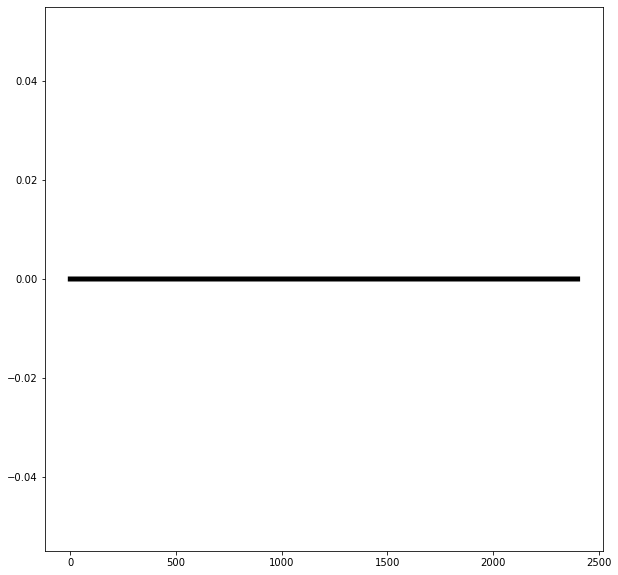

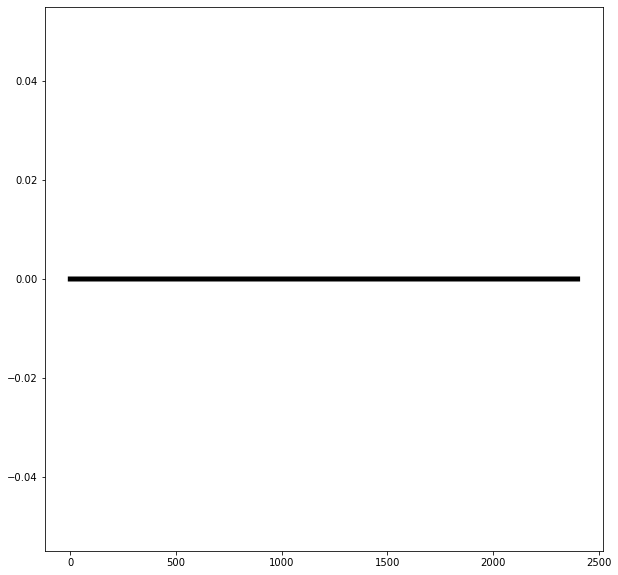

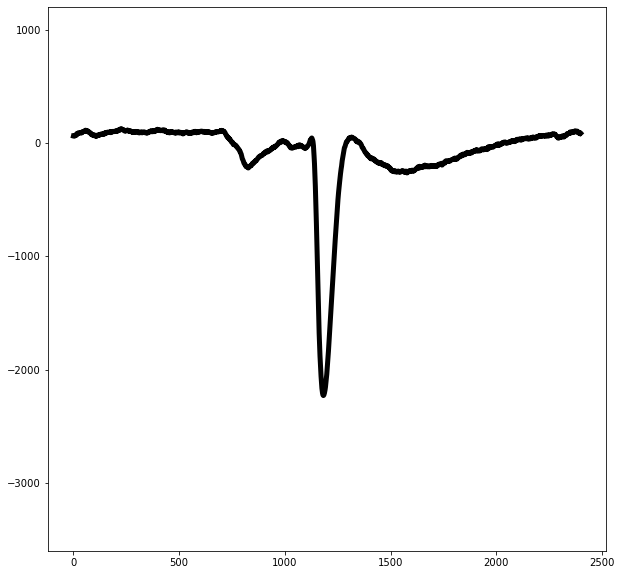

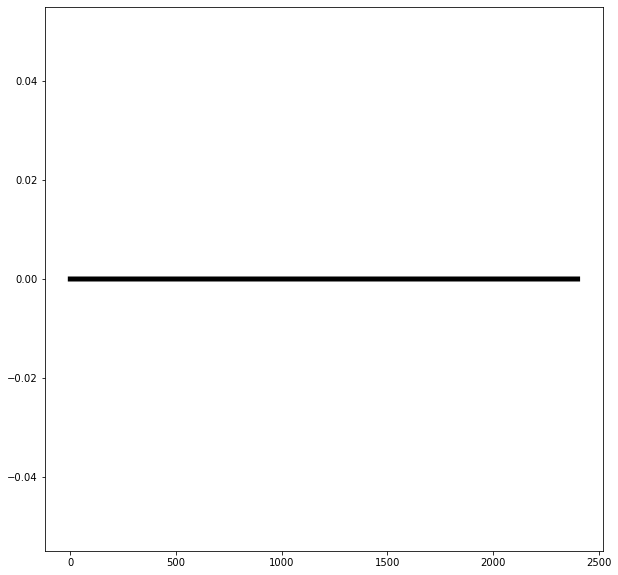

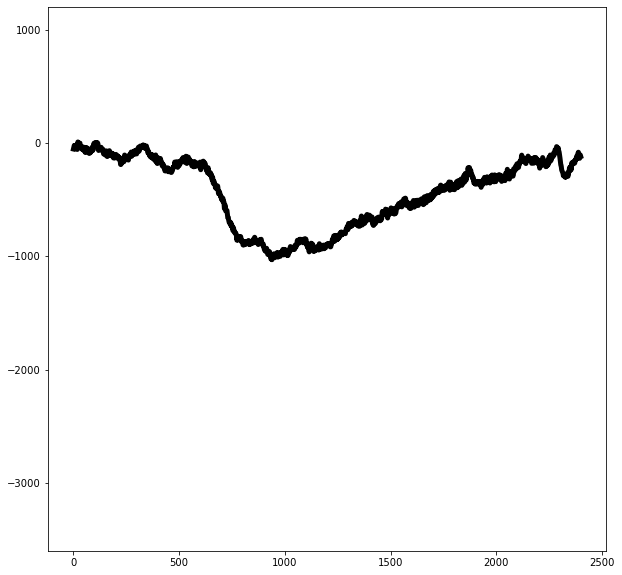

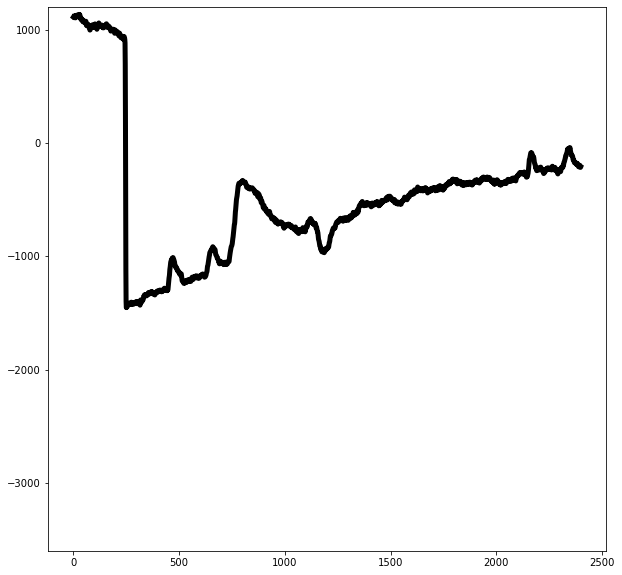

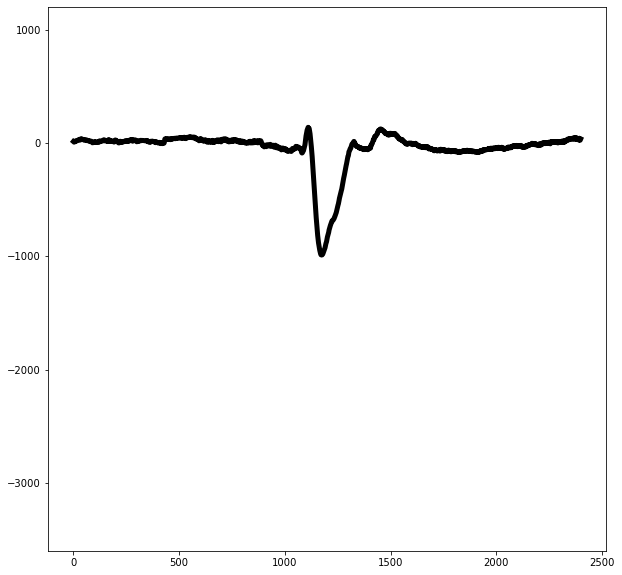

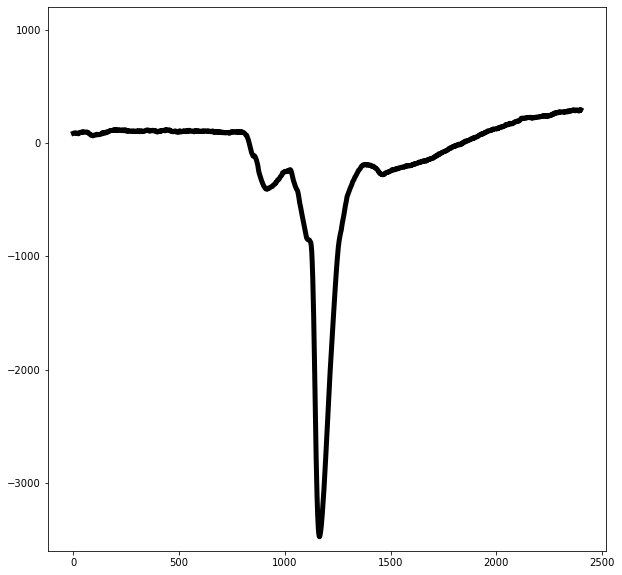

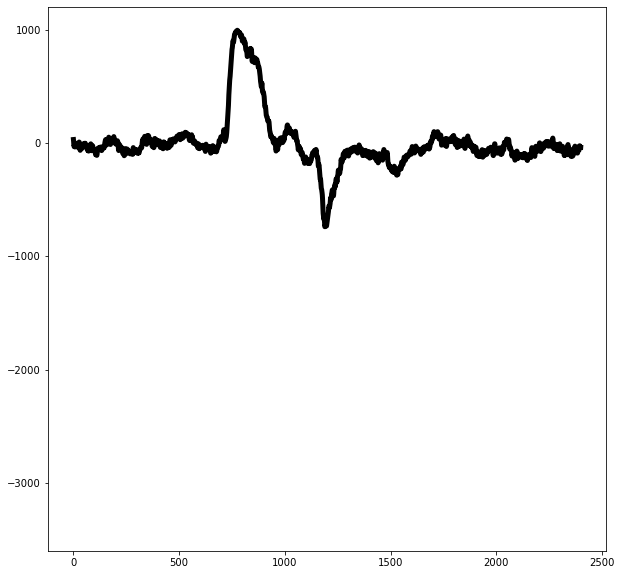

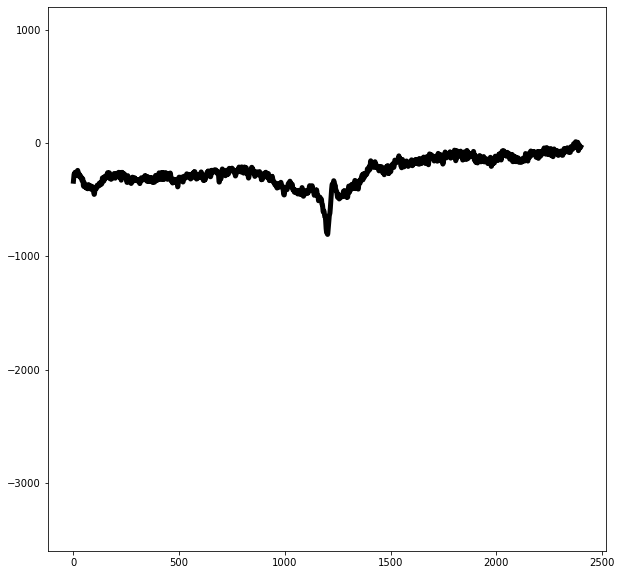

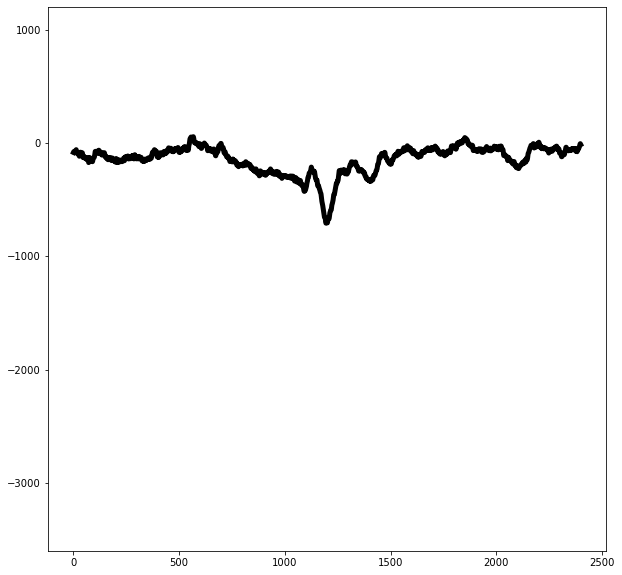

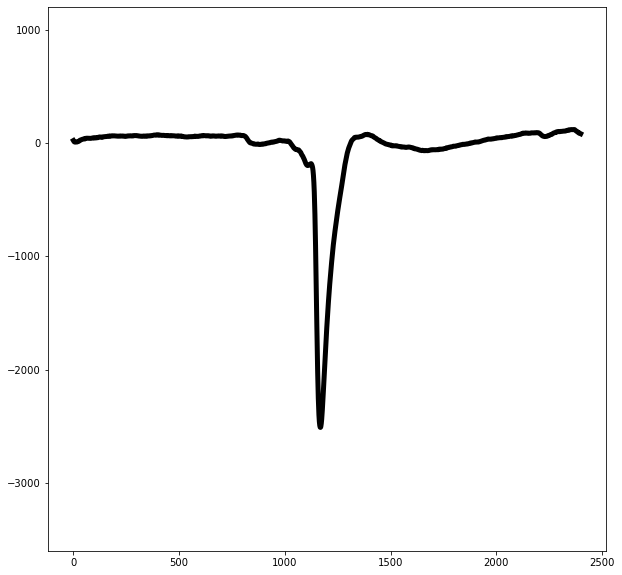

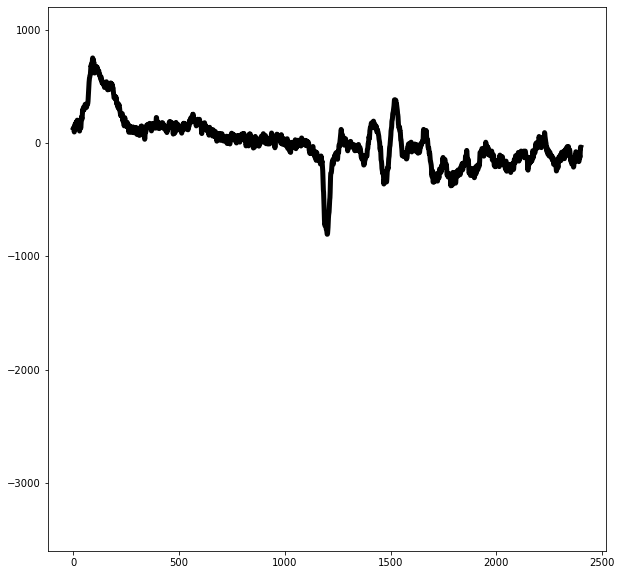

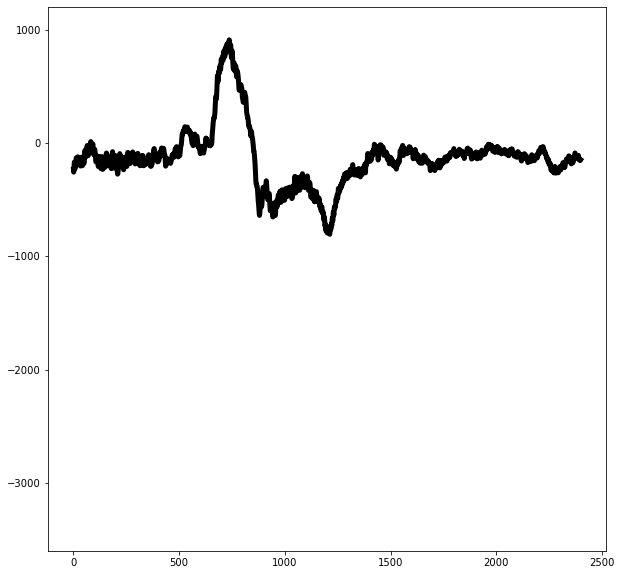

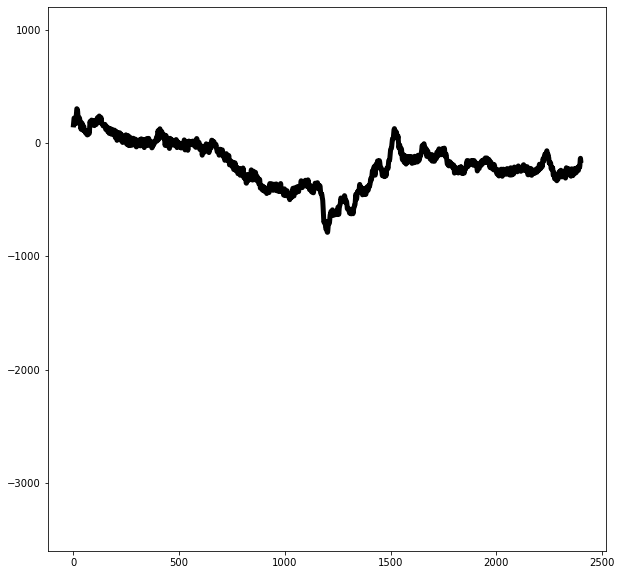

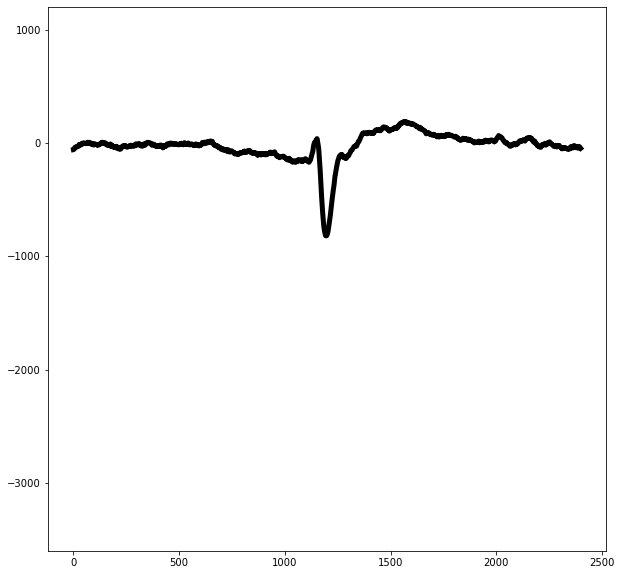

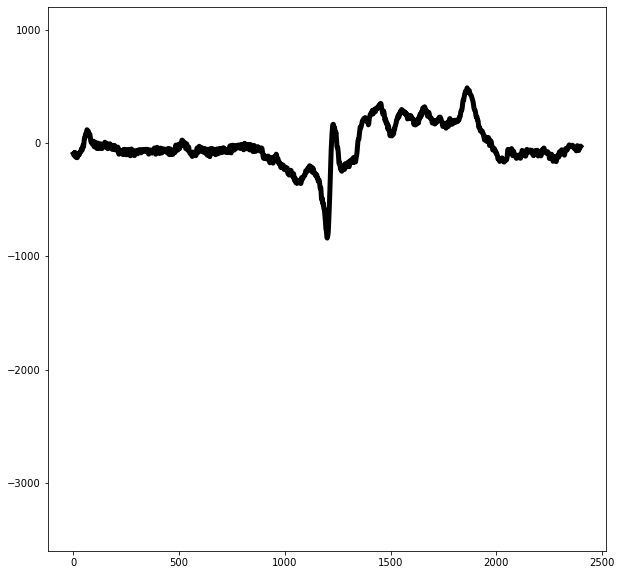

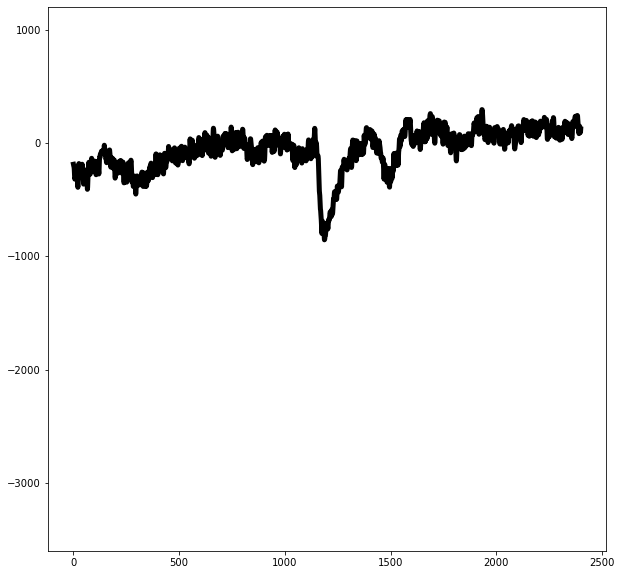

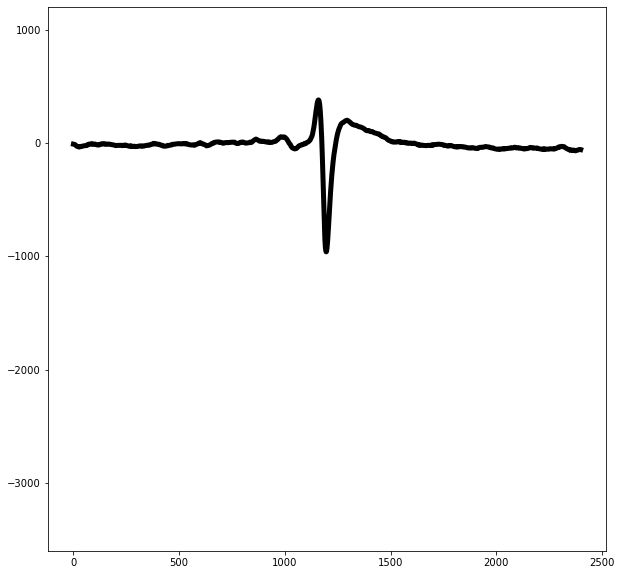

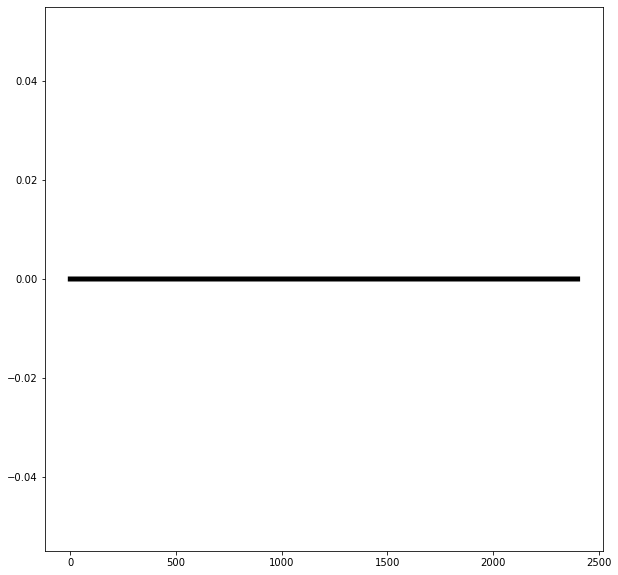

In [19]:
filename = 'Cat3_GRID_LINE/Cat3'
save_EEG(filename,cat3_means,[-3600,1200])

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_11456/1424856156.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,10])


saved


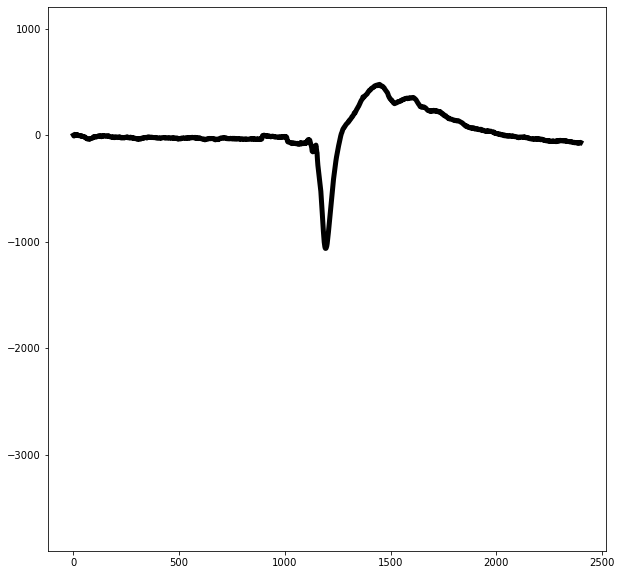

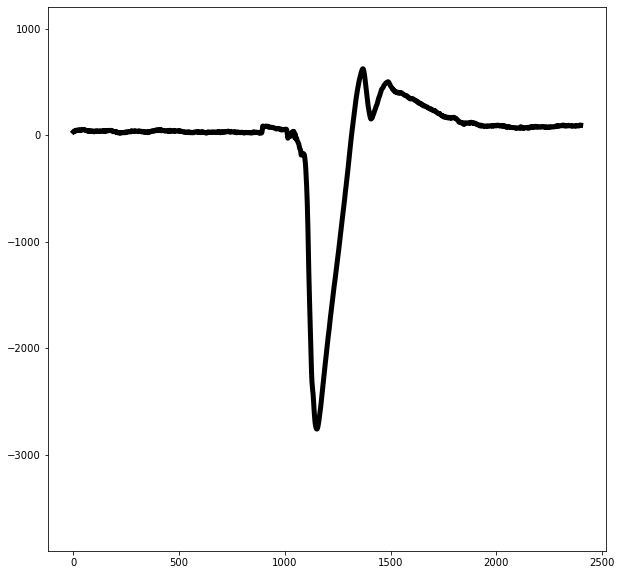

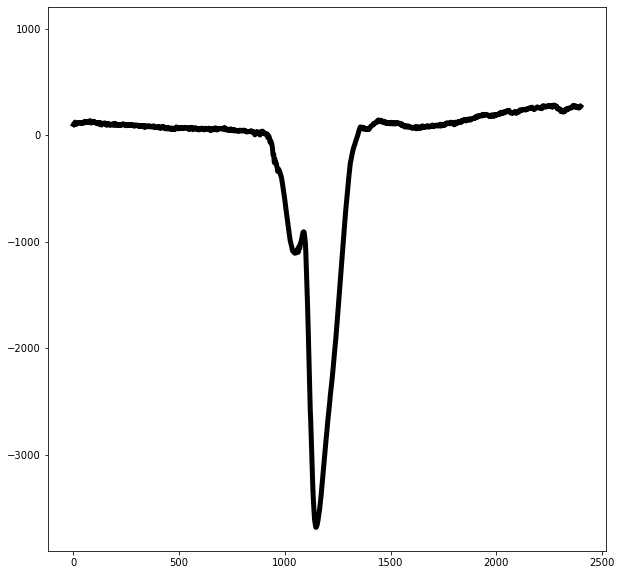

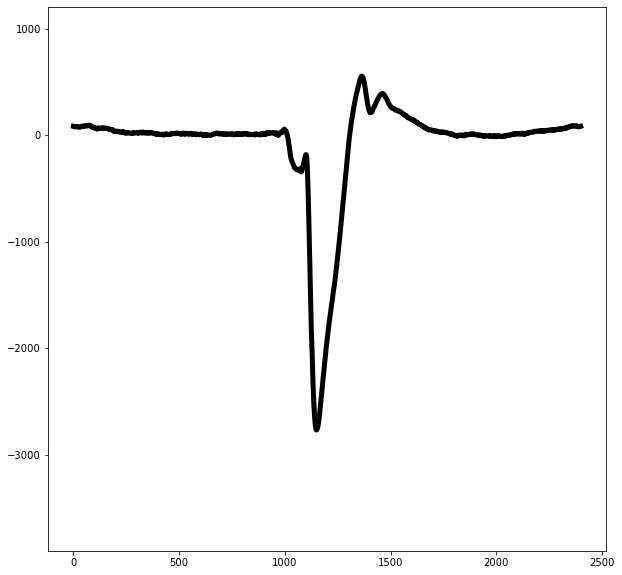

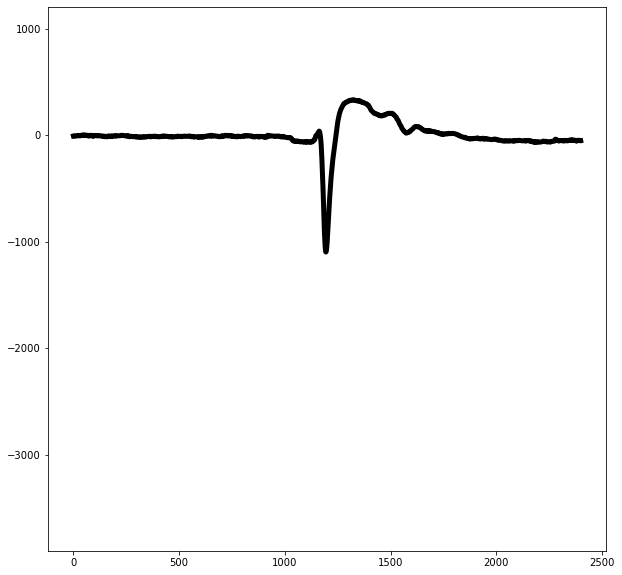

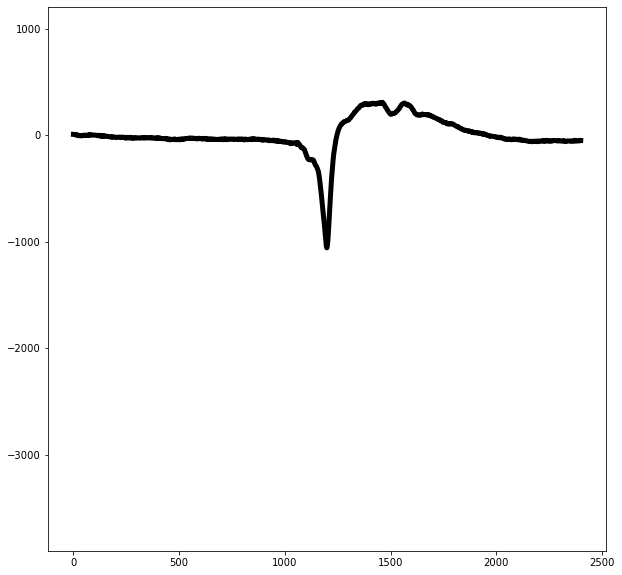

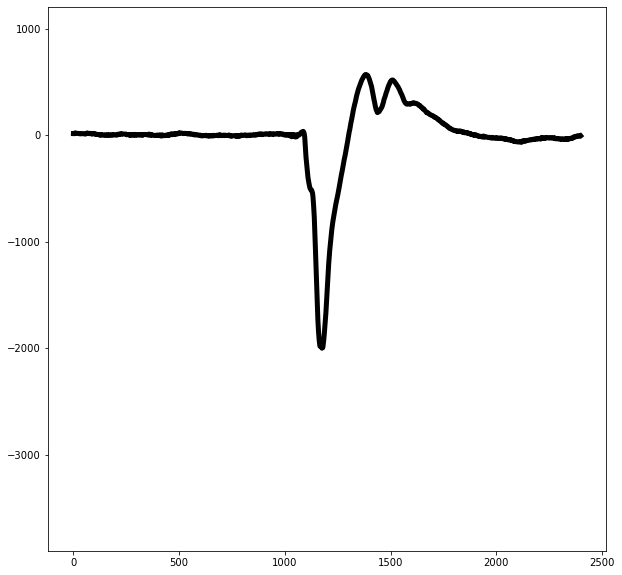

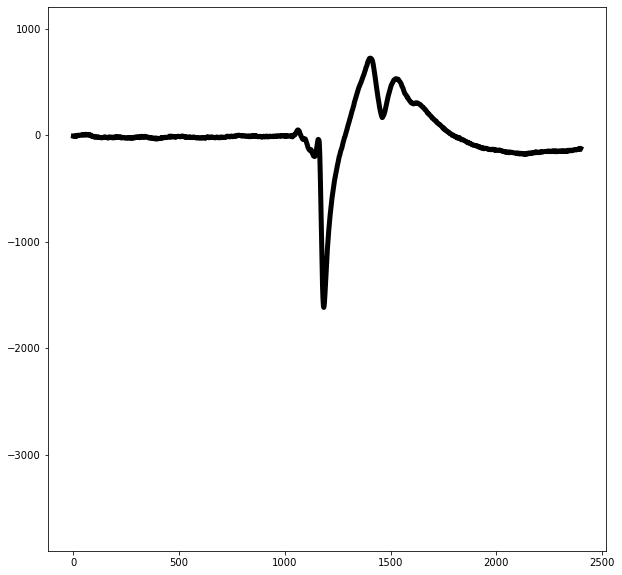

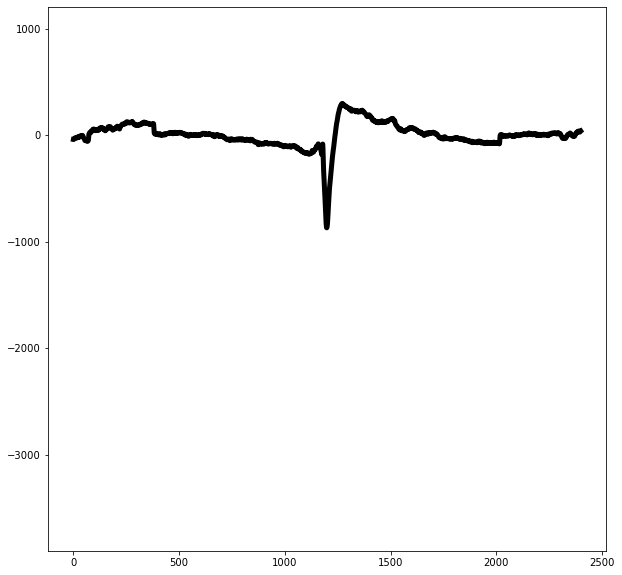

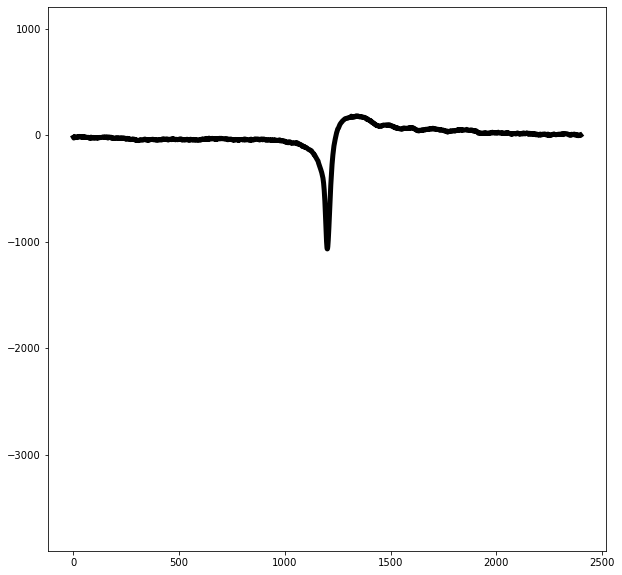

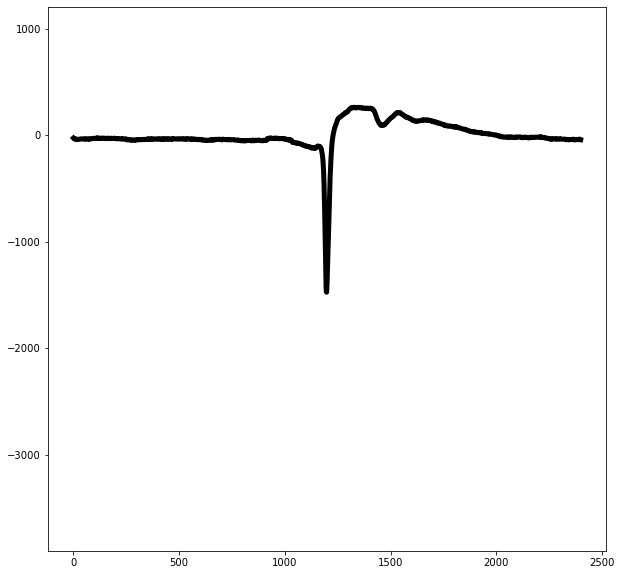

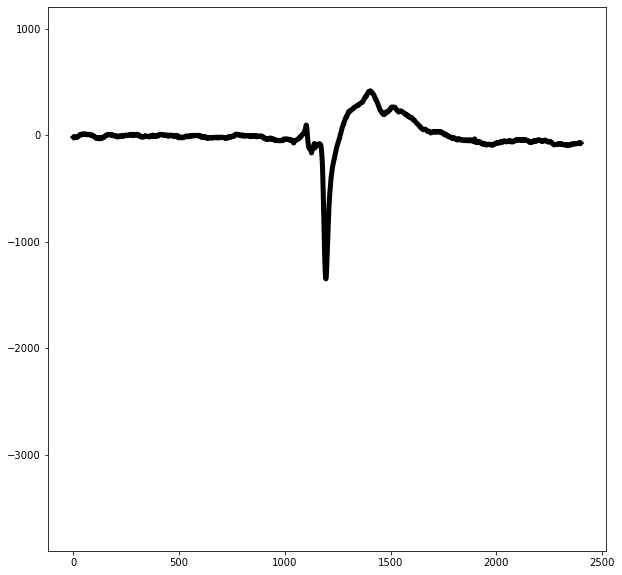

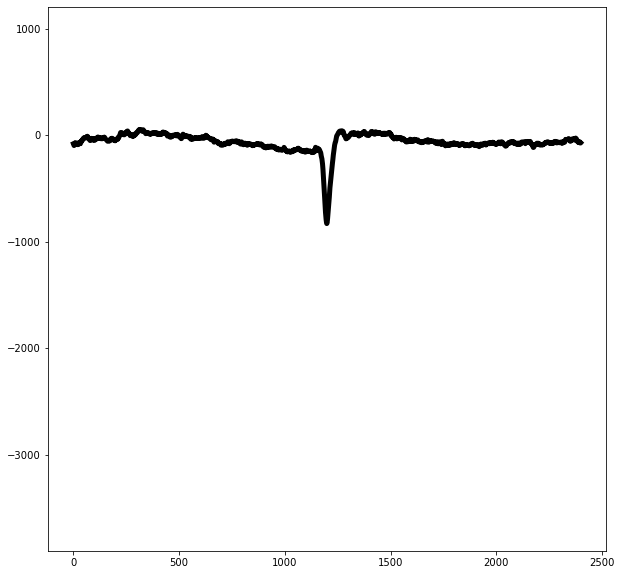

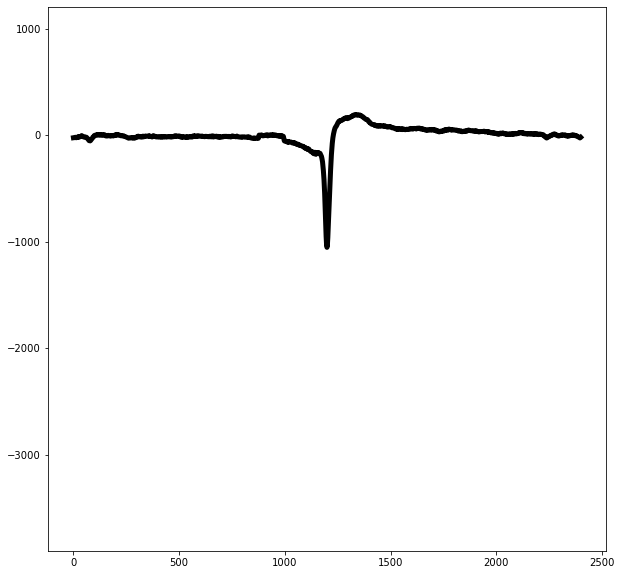

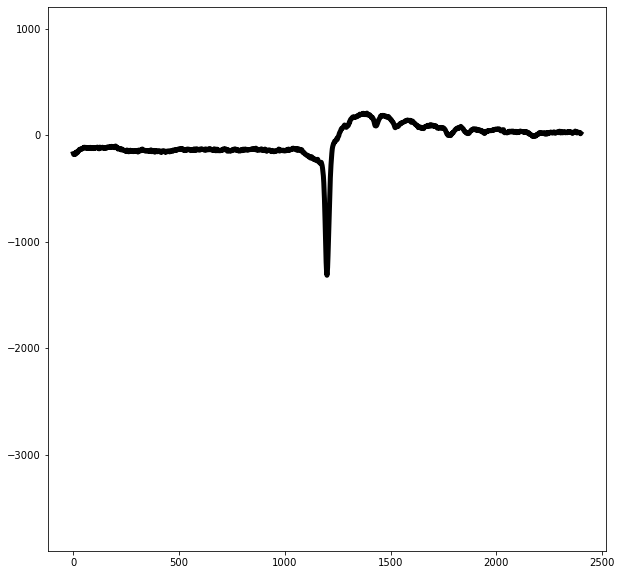

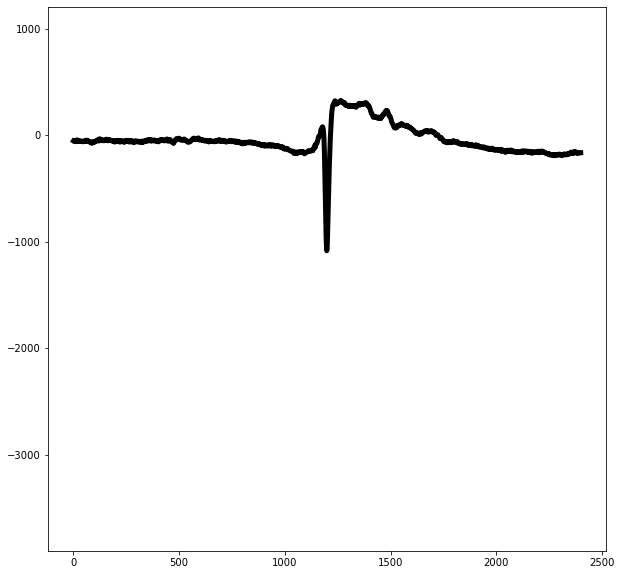

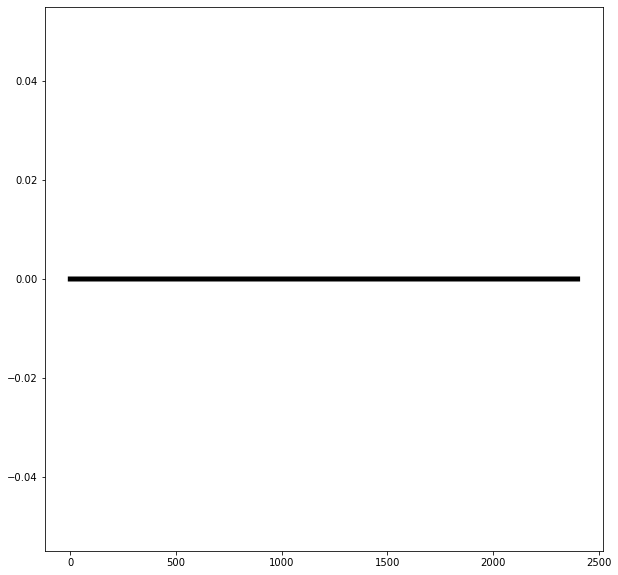

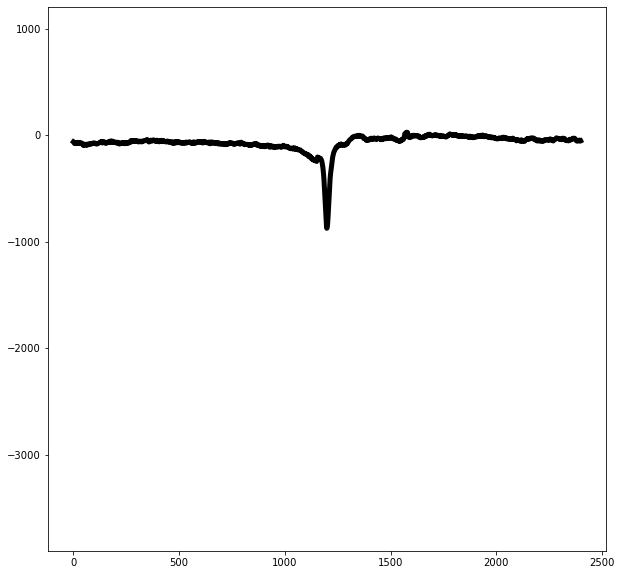

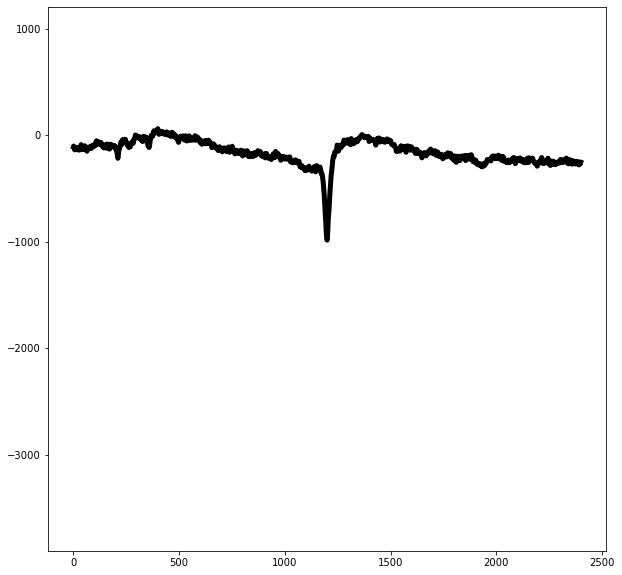

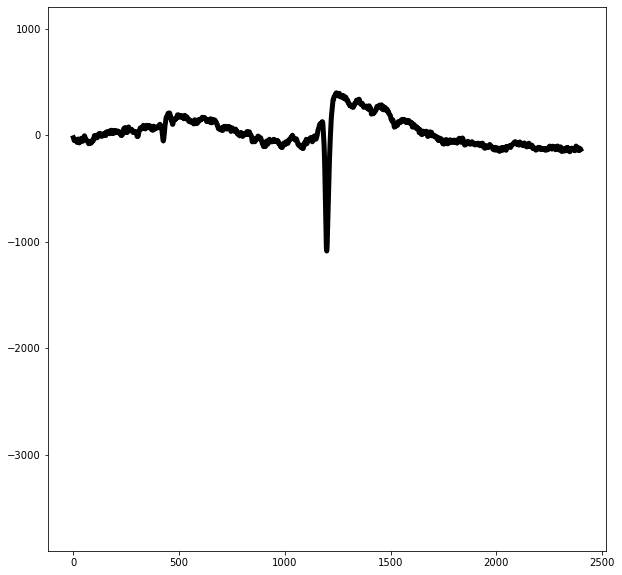

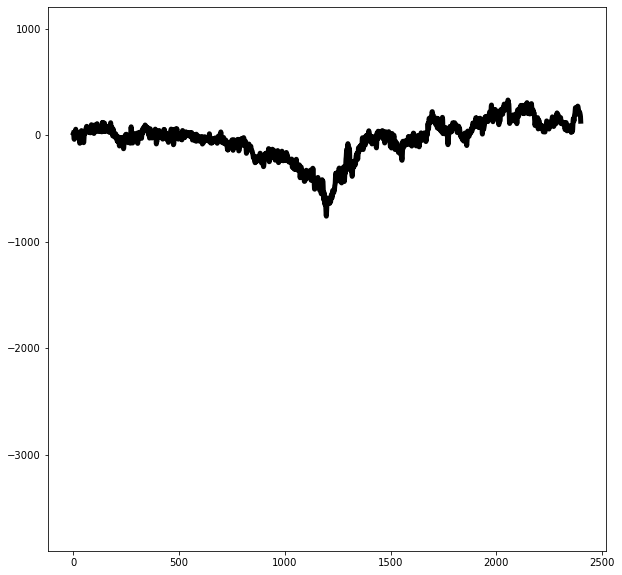

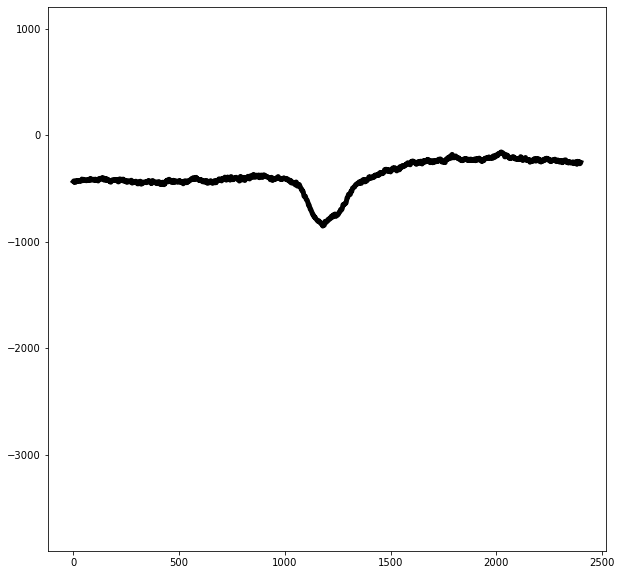

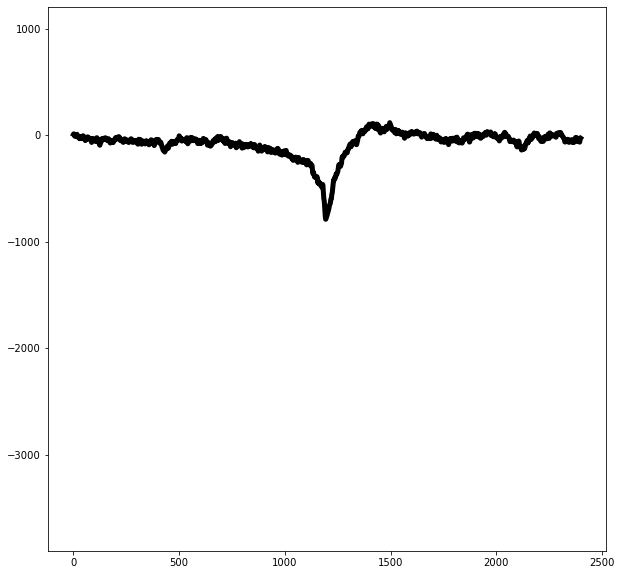

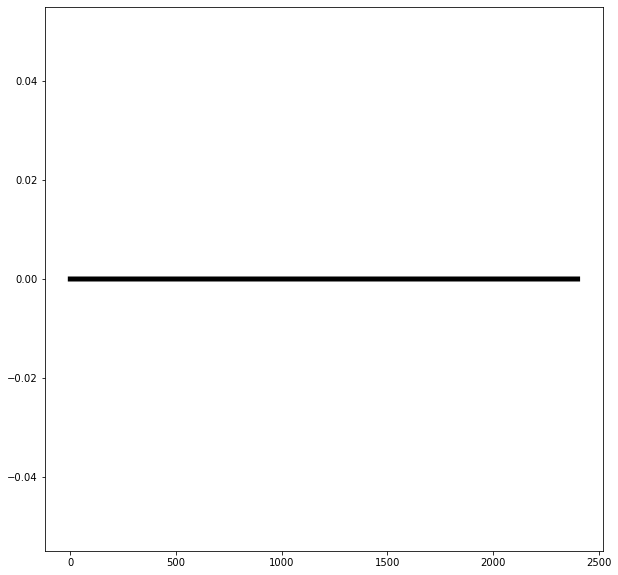

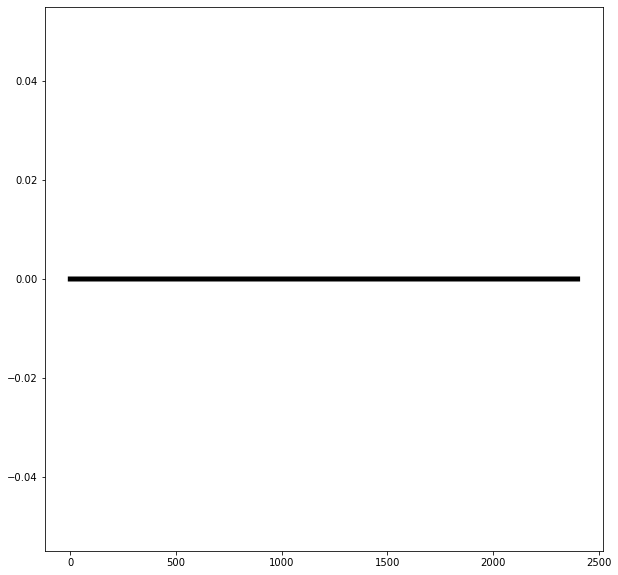

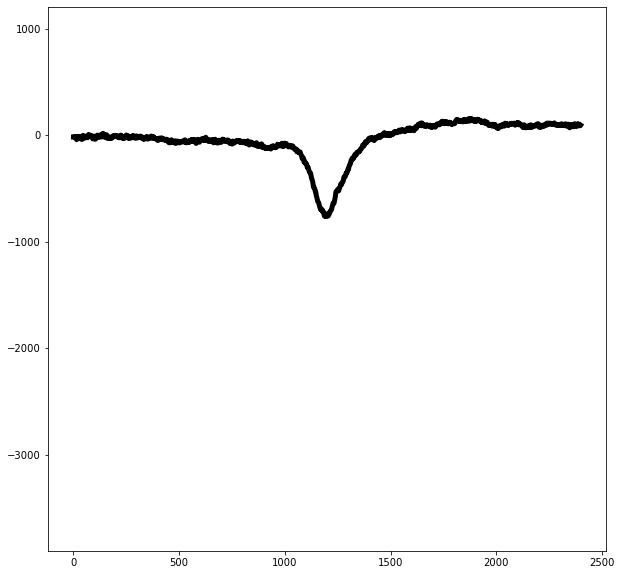

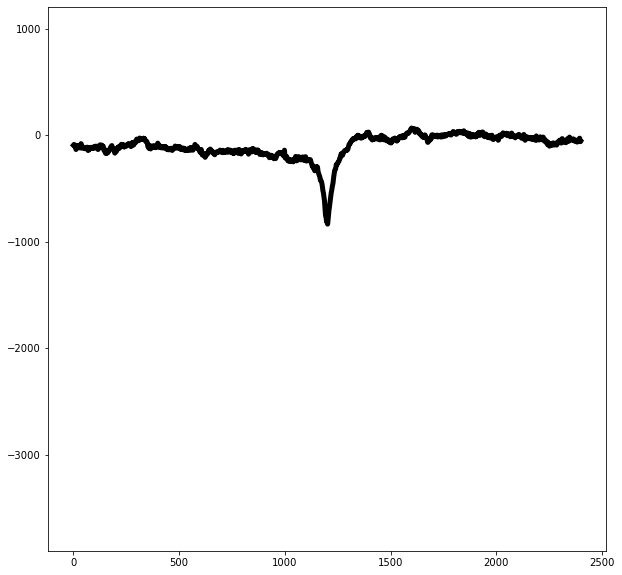

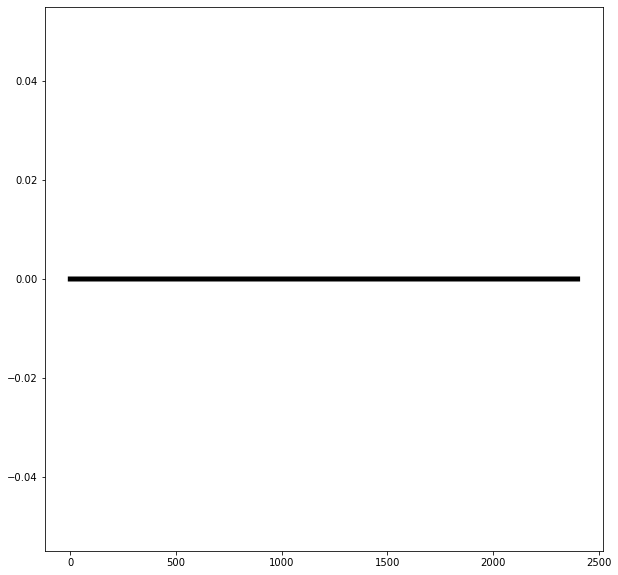

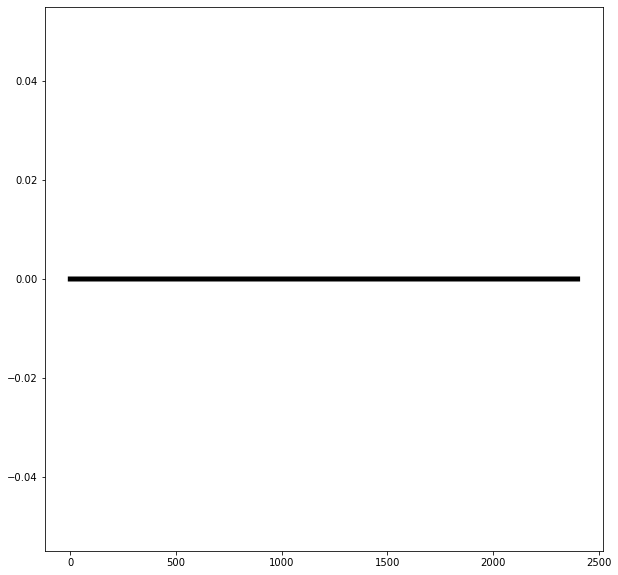

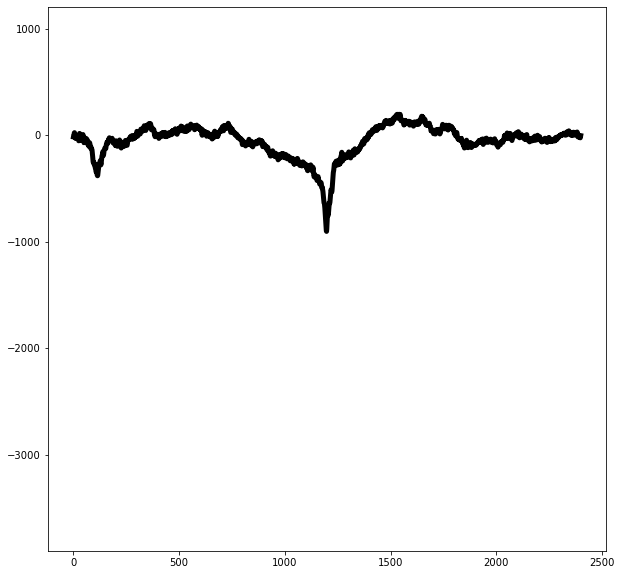

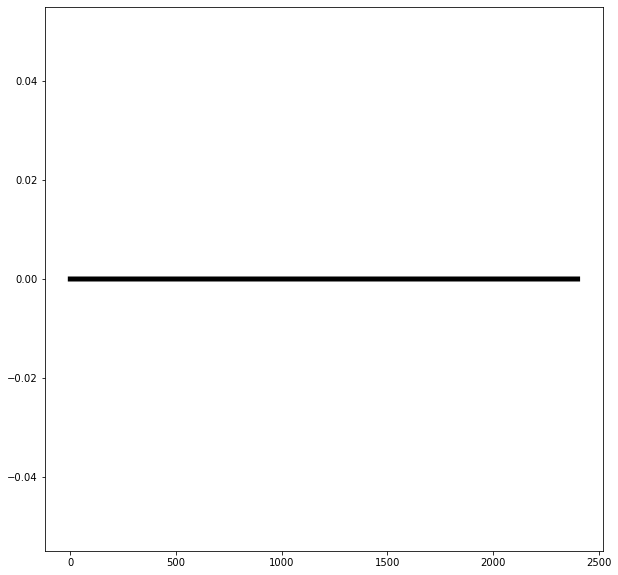

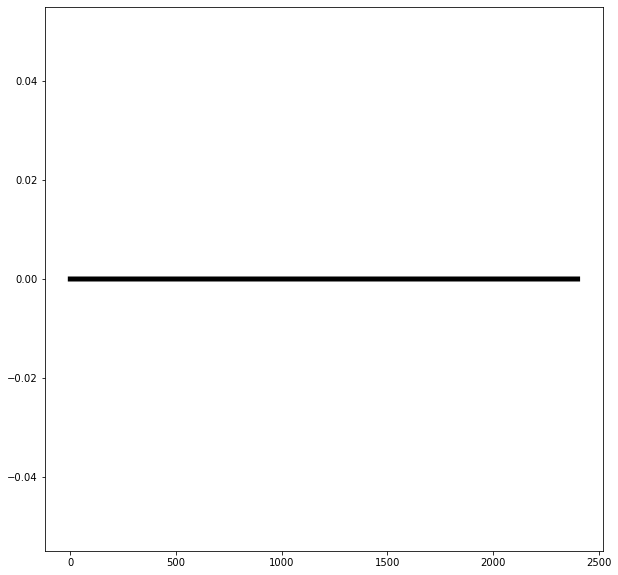

In [20]:
filename = 'Cat4_GRID_LINE/Cat4'
save_EEG(filename,cat4_means,[-3900,1200])

/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/ipykernel_11456/1424856156.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[10,10])


saved


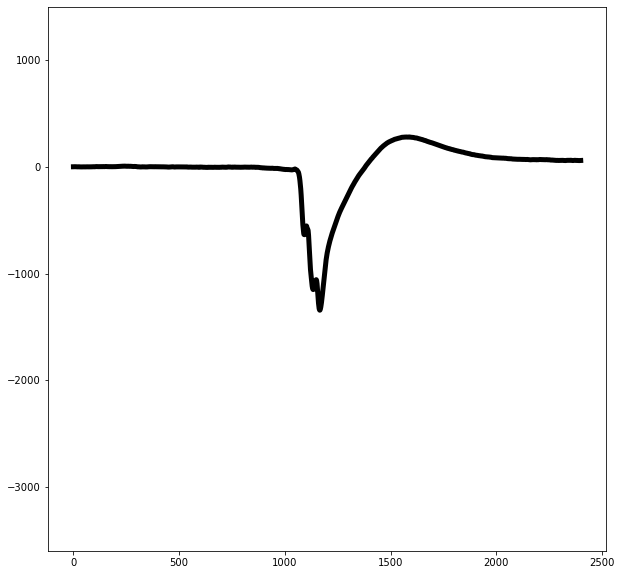

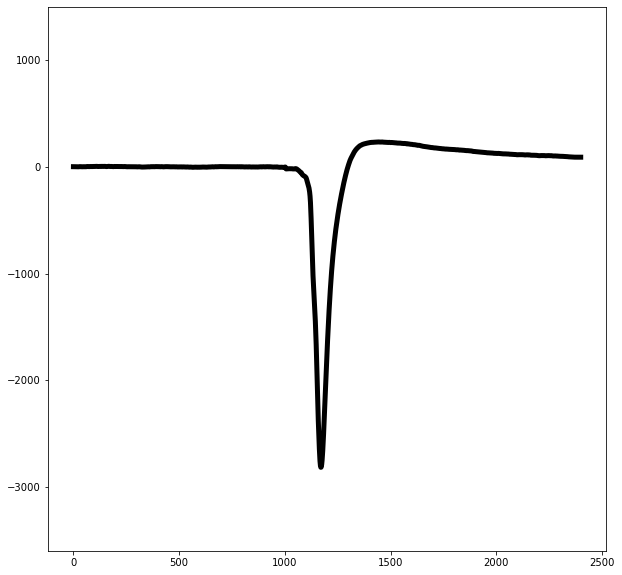

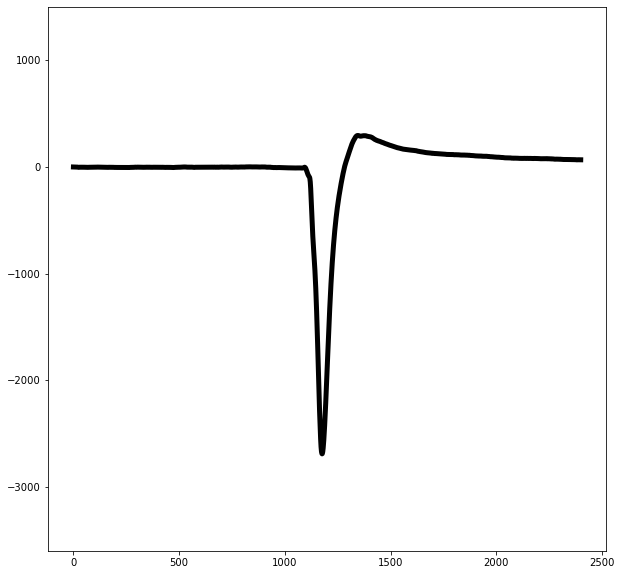

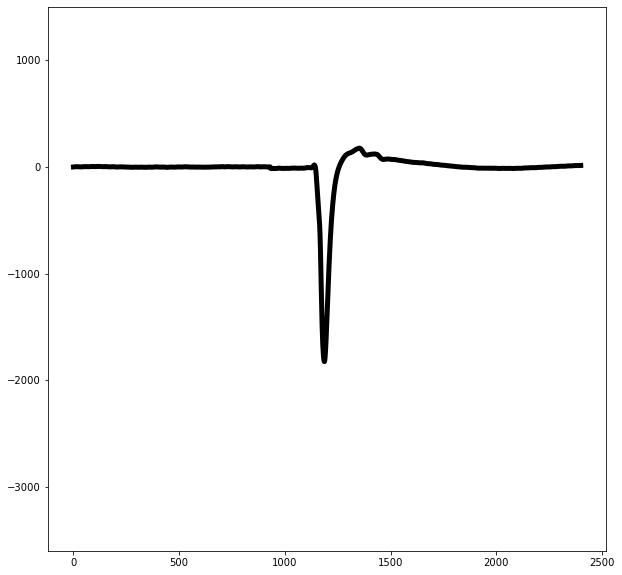

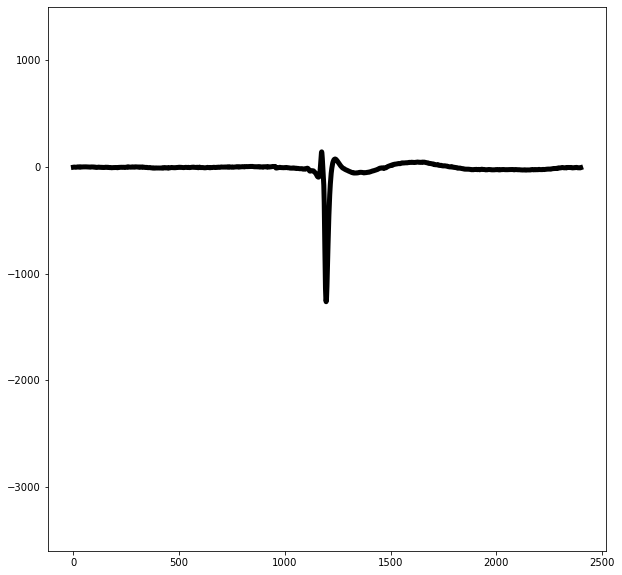

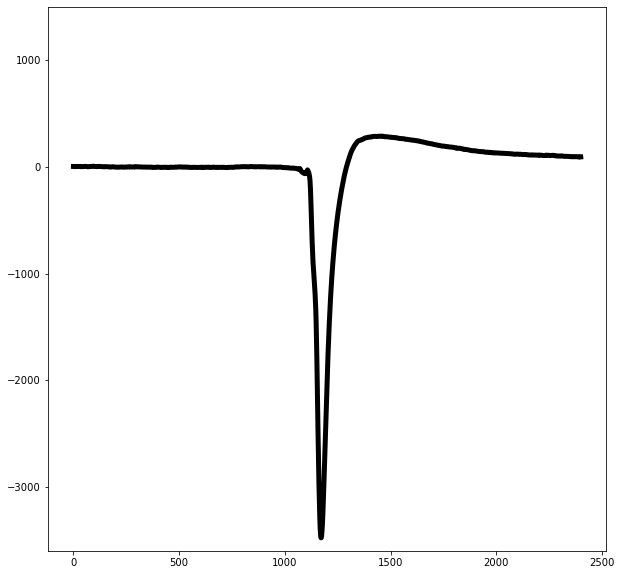

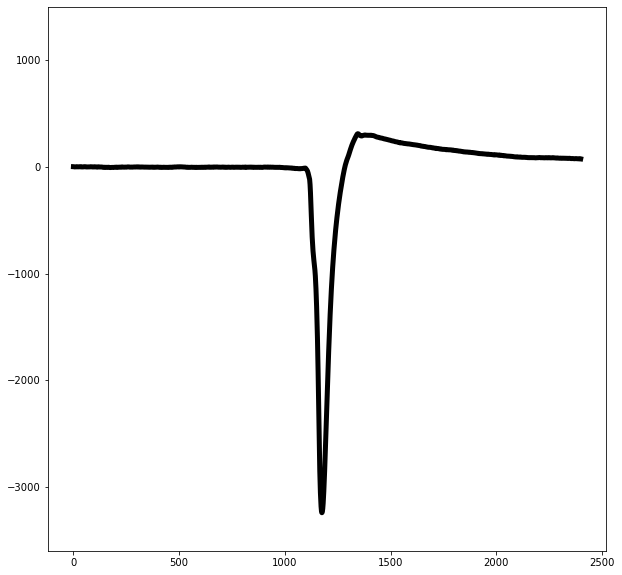

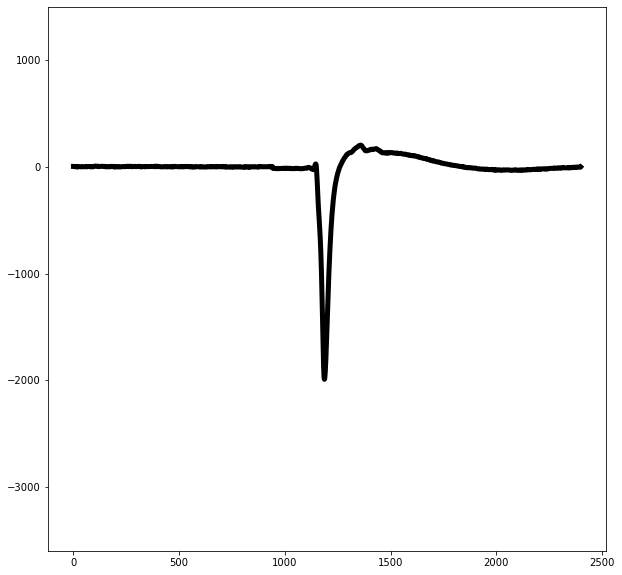

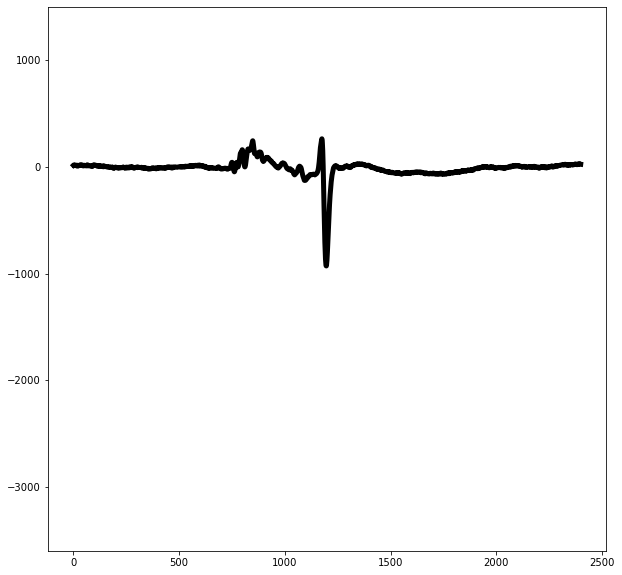

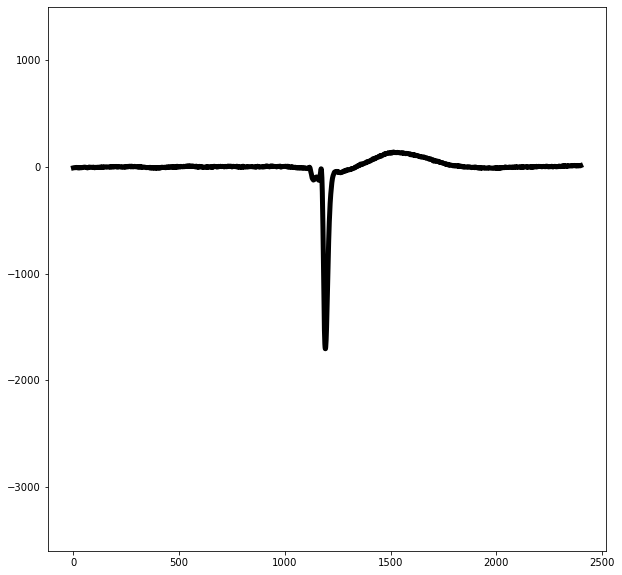

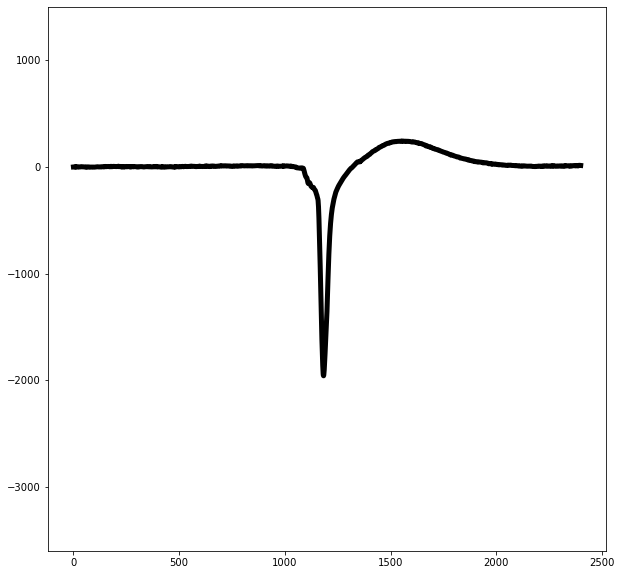

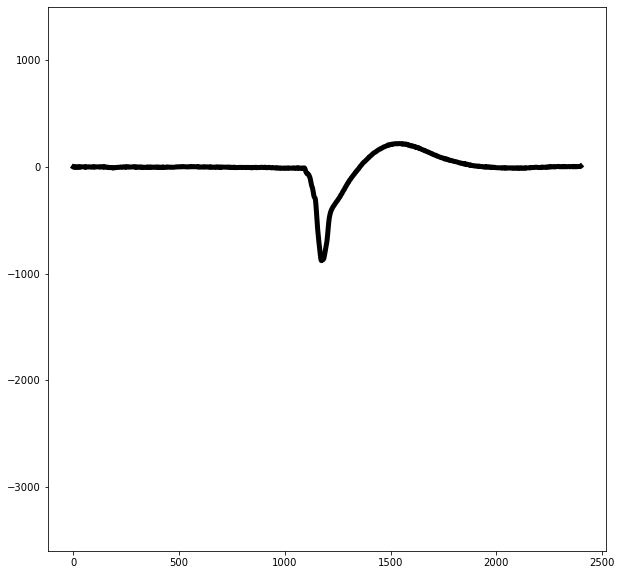

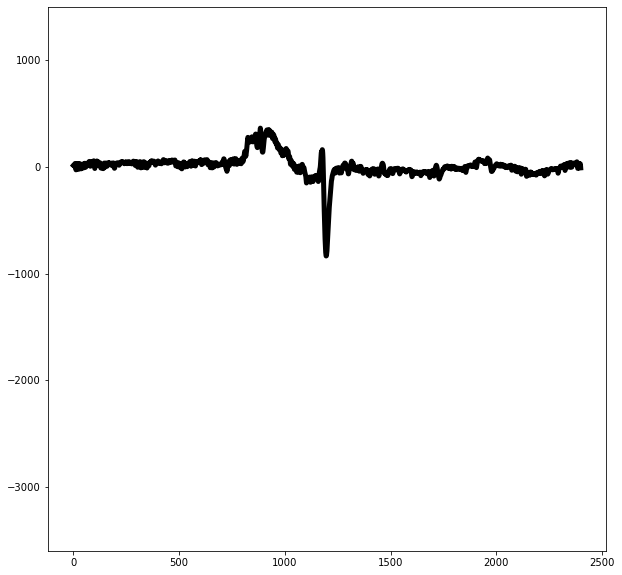

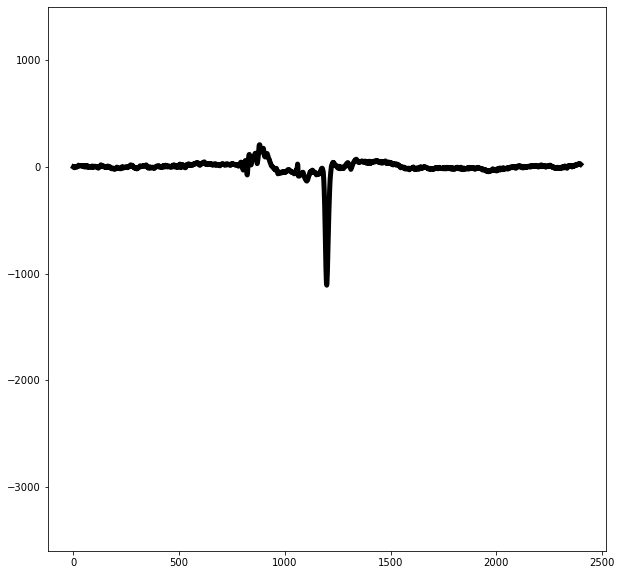

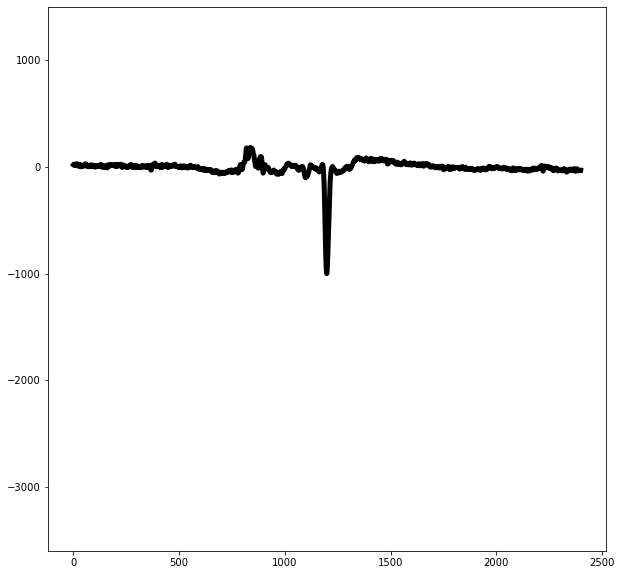

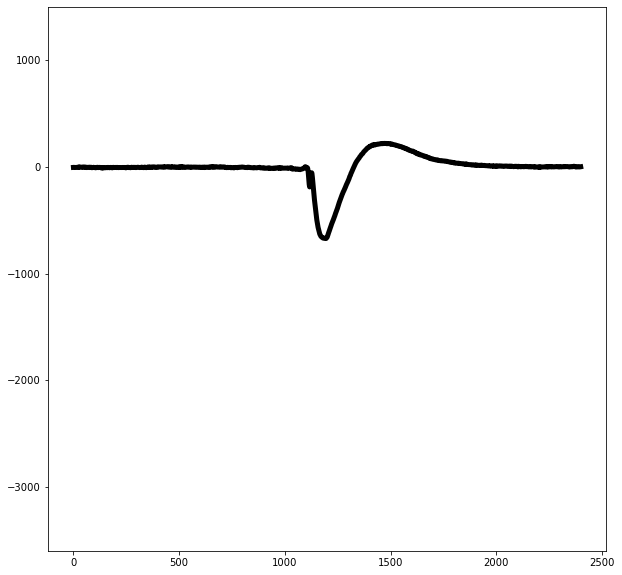

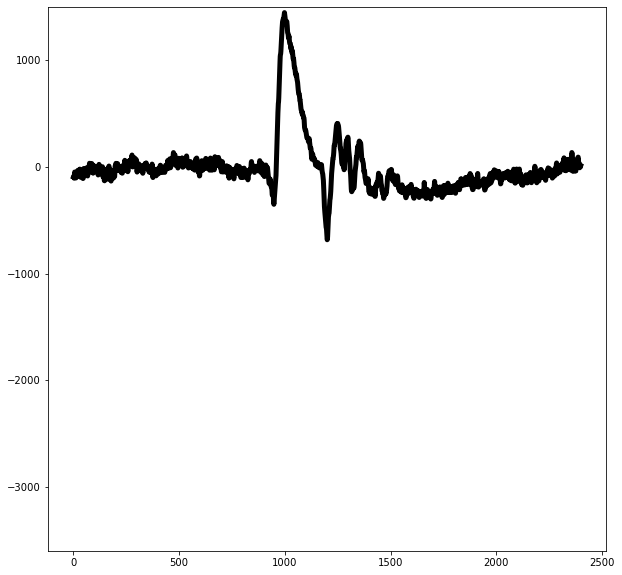

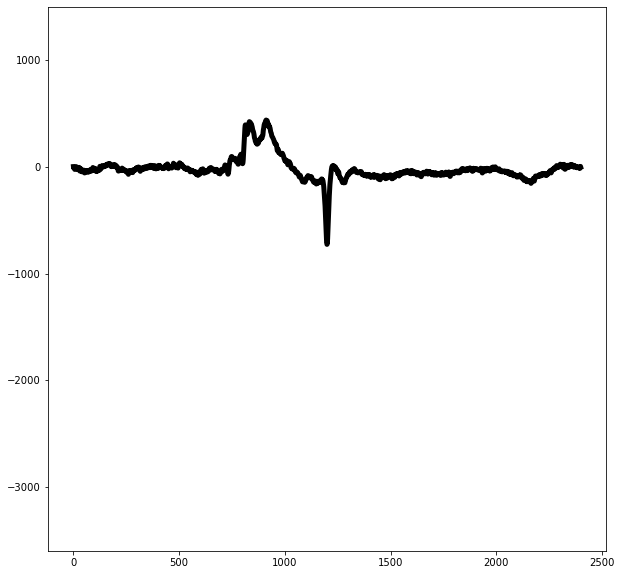

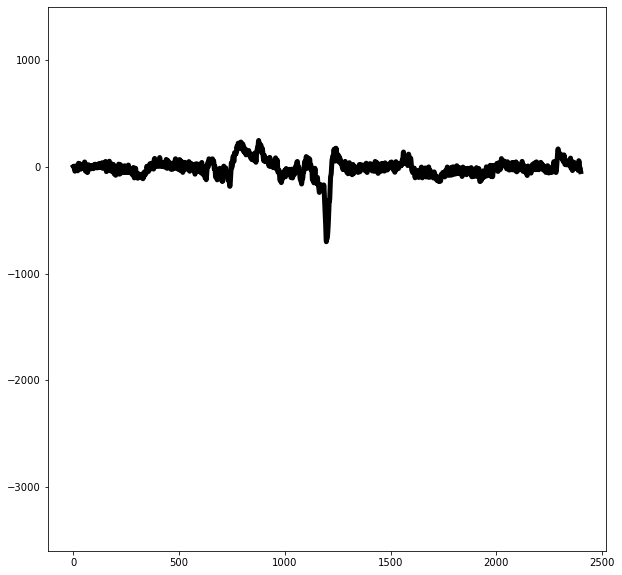

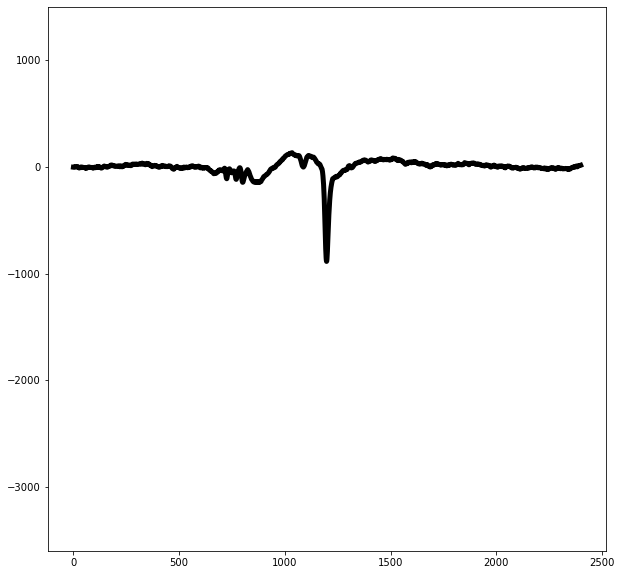

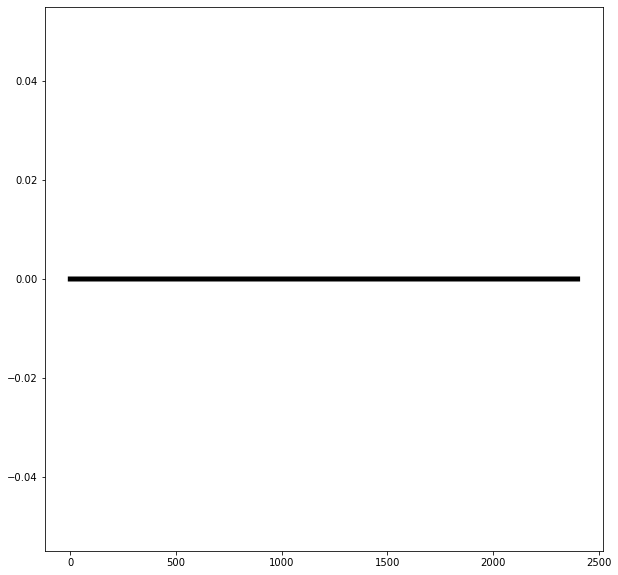

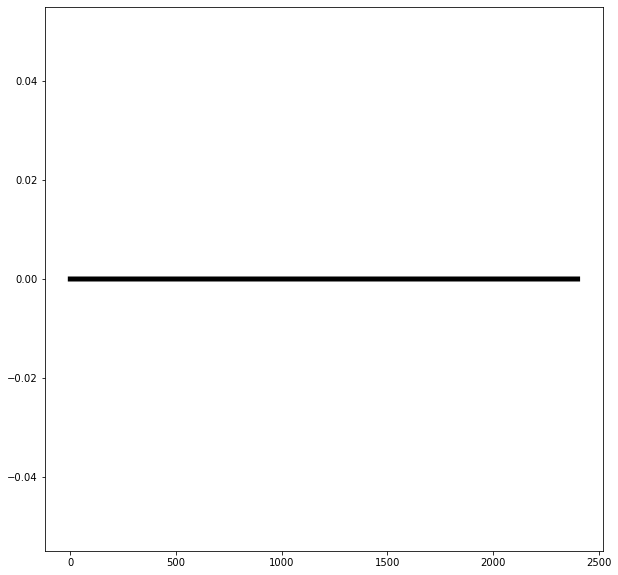

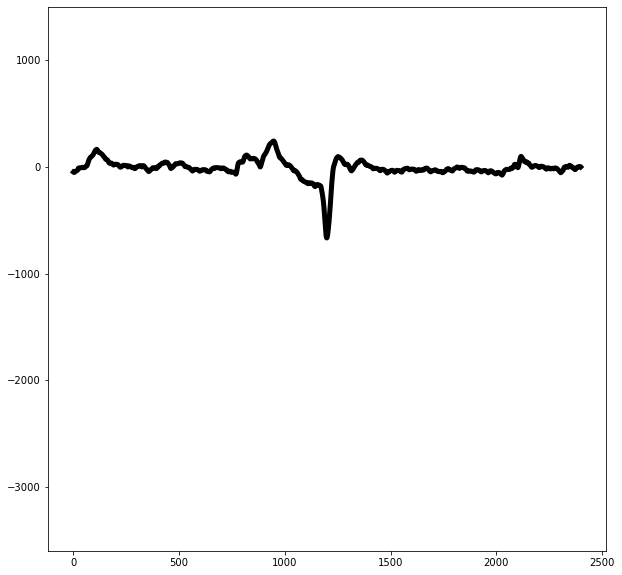

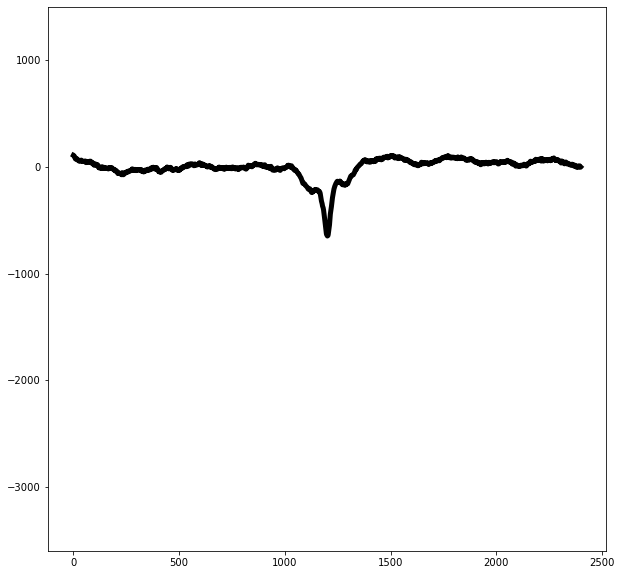

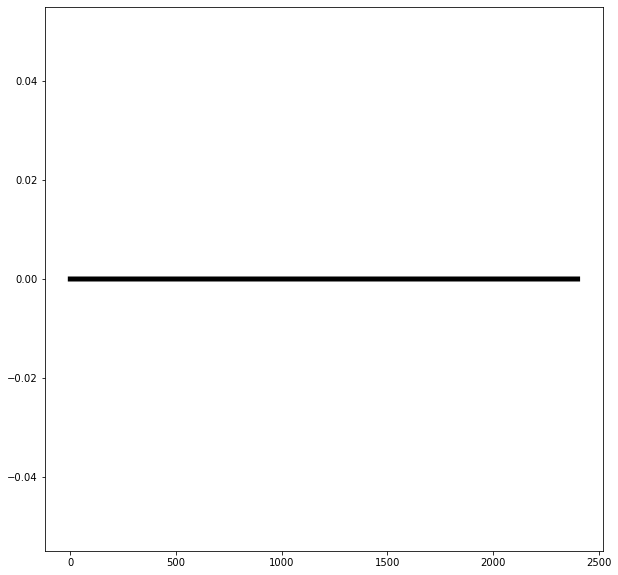

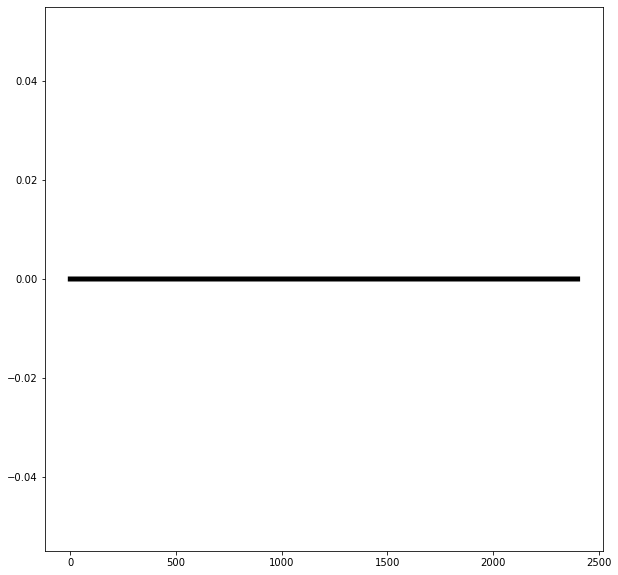

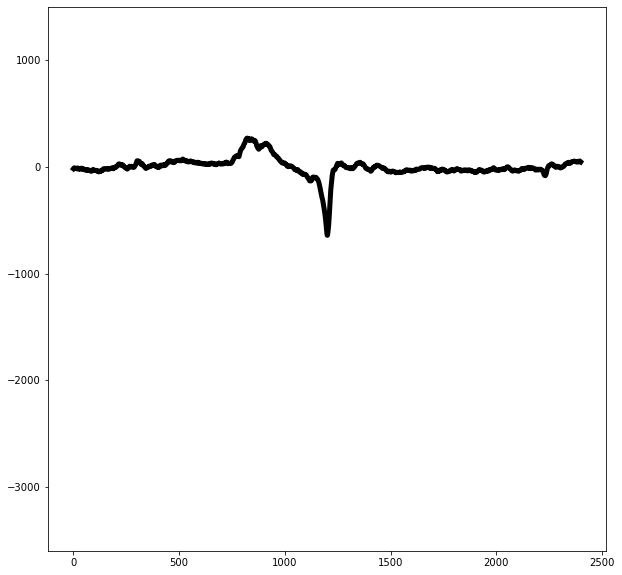

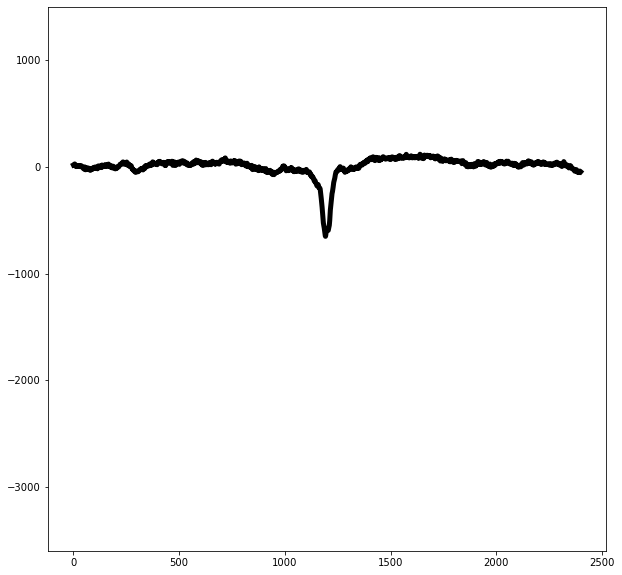

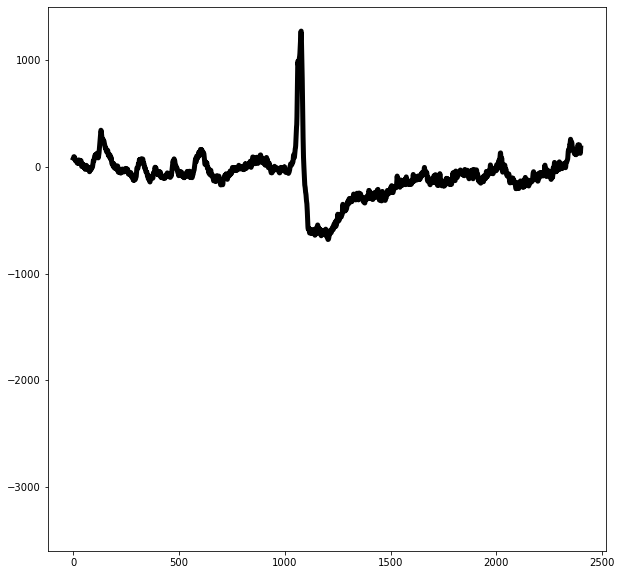

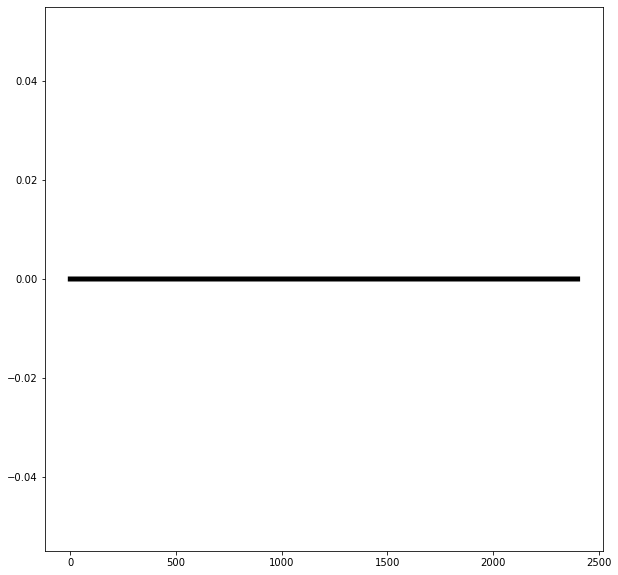

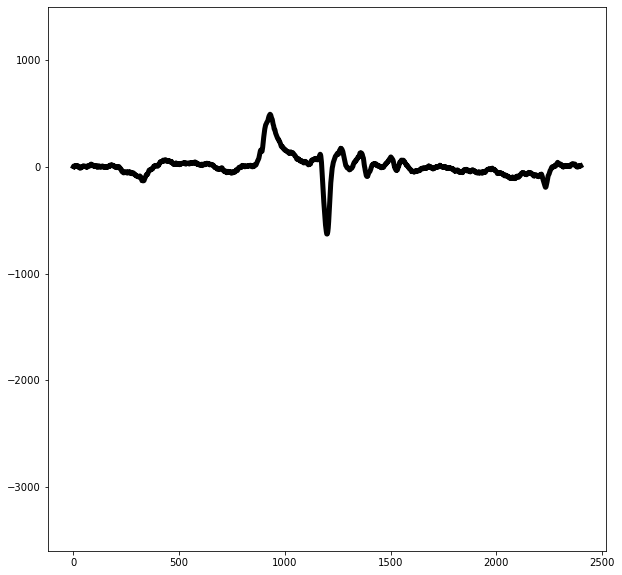

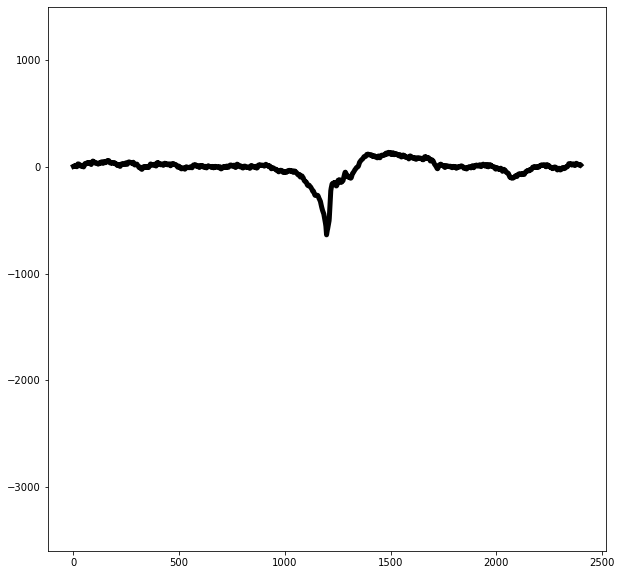

In [21]:
filename = 'Cat5_GRID_LINE/Cat5'
save_EEG(filename,cat5_means,[-3600,1500])